In [1]:
!pip install -q pandas seaborn scikit-plot scikit-image wandb torch-summary plotly umap-learn dotmap einops kornia opencv-python xgboost

In [2]:
!pip3 install -q torchvision # restart kernel

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.11.0 which is incompatible.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
import torch
from train import train_model
import wandb

TRACK = False
if TRACK:
    wandb.login()
    
DEVICE = torch.device("cuda") if torch.cuda.is_available() else "cpu"
arniqa = torch.hub.load(repo_or_dir="miccunifi/ARNIQA", source="github", model="ARNIQA")
arniqa.eval().to(DEVICE)
next(arniqa.parameters()).is_cuda

Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


True

Extracting features:   0%|          | 0/410 [00:00<?, ?it/s]/opt/conda/lib/python3.11/site-packages/torchvision/transforms/functional.py:690: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b_matrix = torch.tensor(startpoints, dtype=torch.float64).view(8)


Training for label 1
Training for label 2
Training for label 3
Training for label 4
Training for label 5
Training for label 6
Training for label 7


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [06:30:59] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


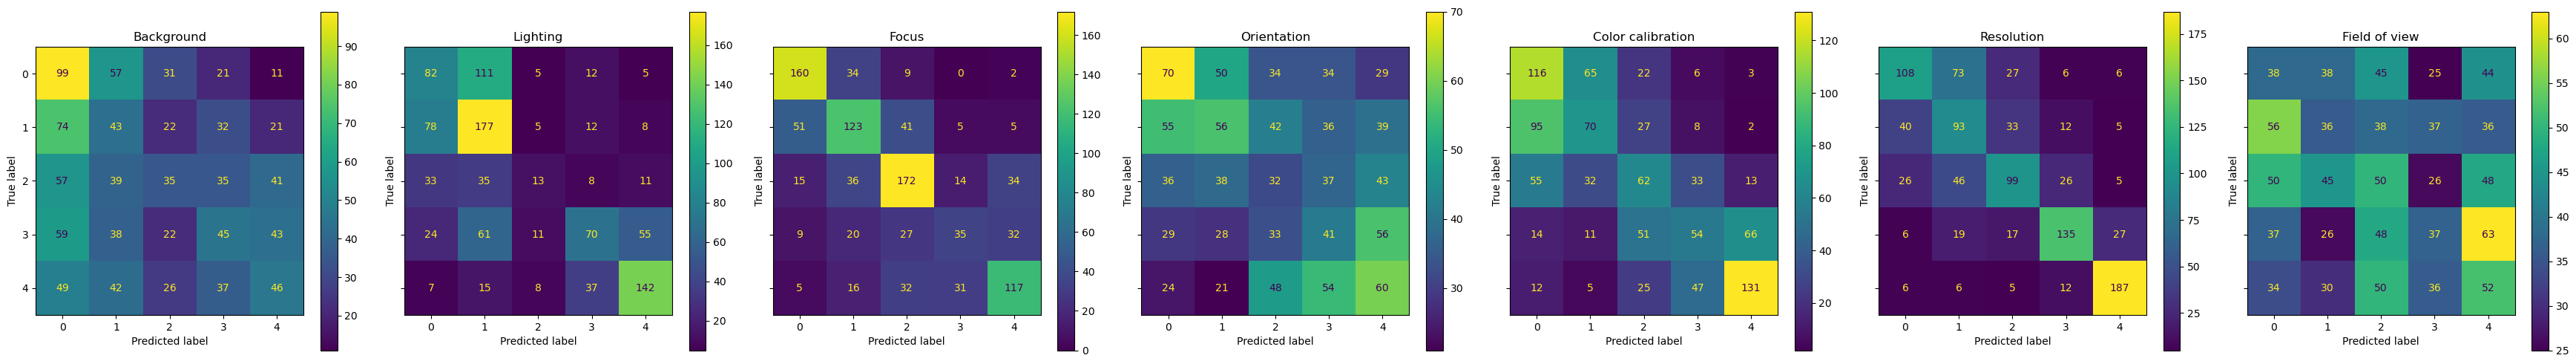


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     25.91      |    25.85     |   0.2254   |   0.2199   |
     Lighting      |     45.31      |    42.79     |   0.6520   |   0.6114   |
      Focus        |     56.87      |    56.57     |   0.7230   |   0.7337   |
   Orientation     |     25.08      |    24.99     |   0.2472   |   0.2461   |
Color calibration  |     41.71      |    41.65     |   0.6869   |   0.6762   |
    Resolution     |     60.80      |    60.33     |   0.7517   |   0.7511   |
  Field of view    |     20.85      |    20.77     |   0.0901   |   0.0915   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  1.0098   |   2.1805   |     40.11      |    40.01     |   0.4810   |   0.4756   |


In [4]:
classifier, pred, val = train_model('images', num_distortions=10, crop=False, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, regression=False, track=TRACK)

Extracting features:   0%|          | 0/410 [00:00<?, ?it/s]/opt/conda/lib/python3.11/site-packages/torchvision/transforms/functional.py:690: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b_matrix = torch.tensor(startpoints, dtype=torch.float64).view(8)


Training for label 1
Training for label 2
Training for label 3
Training for label 4
Training for label 5
Training for label 6
Training for label 7


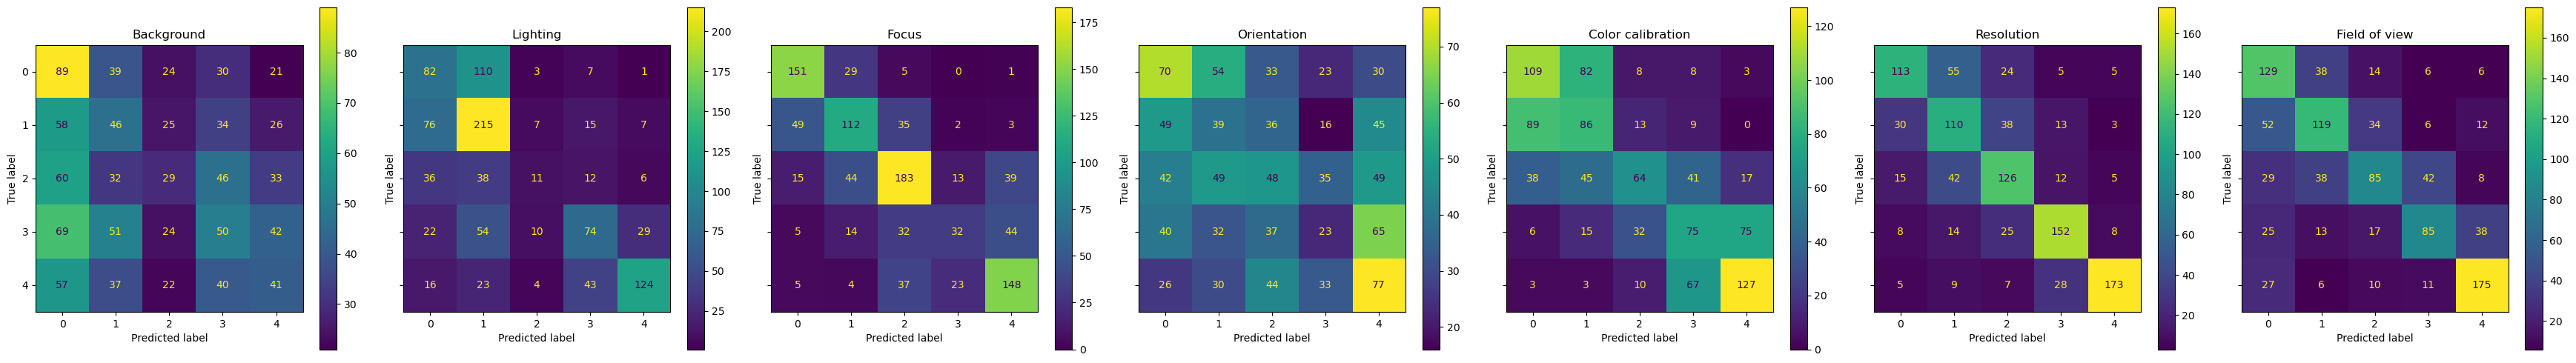


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     24.54      |    24.94     |   0.1235   |   0.1213   |
     Lighting      |     47.78      |    43.29     |   0.6374   |   0.5762   |
      Focus        |     58.73      |    58.51     |   0.7751   |   0.7847   |
   Orientation     |     24.17      |    24.86     |   0.2311   |   0.2314   |
Color calibration  |     45.36      |    44.84     |   0.7552   |   0.7463   |
    Resolution     |     66.55      |    65.40     |   0.7670   |   0.7682   |
  Field of view    |     57.57      |    57.29     |   0.6545   |   0.6433   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.8739   |   1.8626   |     47.11      |    46.77     |   0.5579   |   0.5504   |


In [9]:
classifier, pred, val = train_model('f17k', num_distortions=10, crop=False, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, regression=False, track=TRACK)

Loaded features from f17k/embeddings/features_2.npy
Loaded scores from f17k/embeddings/scores_2.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [09:39:40] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


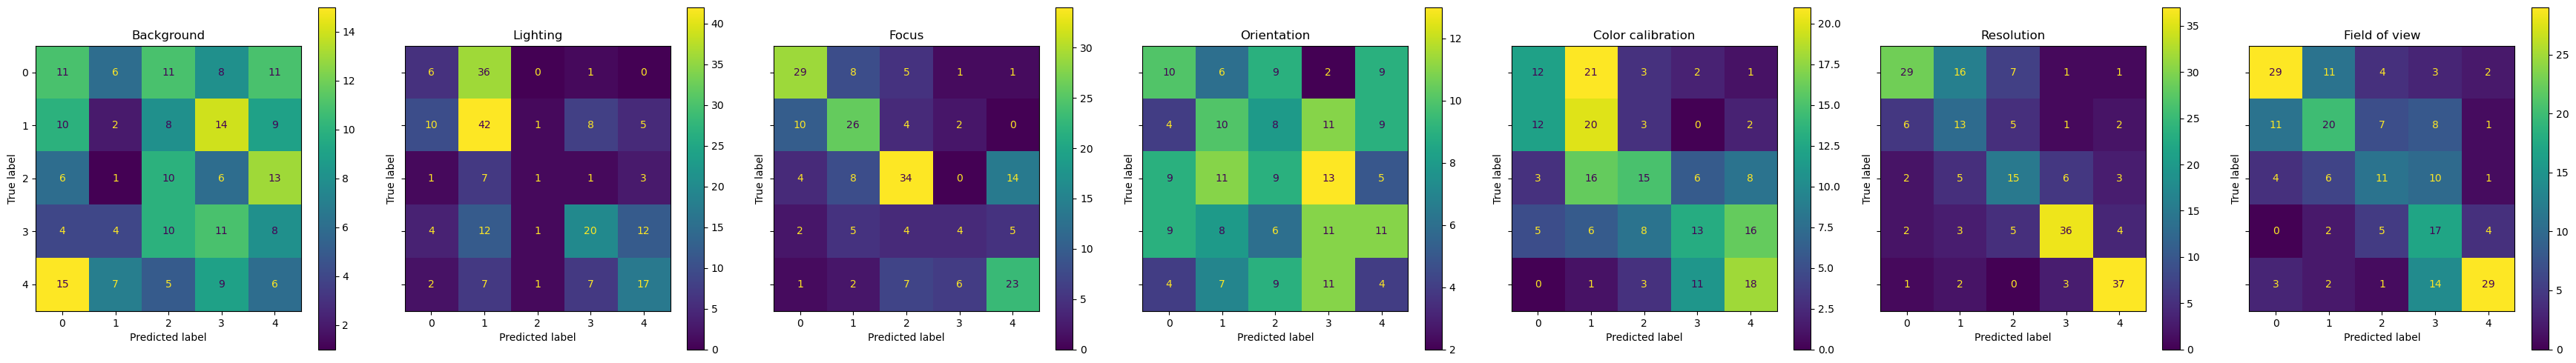


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     18.46      |    19.97     |  -0.0659   |  -0.0596   |
     Lighting      |     38.29      |    35.22     |   0.5456   |   0.5140   |
      Focus        |     52.67      |    52.69     |   0.6627   |   0.6741   |
   Orientation     |     21.40      |    21.32     |   0.0422   |   0.0402   |
Color calibration  |     39.25      |    39.54     |   0.6260   |   0.6261   |
    Resolution     |     61.61      |    61.66     |   0.7698   |   0.7733   |
  Field of view    |     52.17      |    51.20     |   0.6856   |   0.6818   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9847   |   2.1429   |     42.03      |    41.78     |   0.4716   |   0.4695   |


In [5]:
classifier, pred, val = train_model('f17k', num_distortions=2, crop=False, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, regression=False, track=TRACK)

Loaded features from f17k/embeddings/features_0_crops.npy
Loaded scores from f17k/embeddings/scores_0_crops.npy
Create sweep with ID: 3h192g1h
Sweep URL: https://wandb.ai/choekyel-hslu/BAA/sweeps/3h192g1h


wandb: Agent Starting Run: 9kyvhota with config:
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 50
wandb: 	subsample: 1
wandb: Currently logged in as: choekyel-hslu. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


Training for label 1
[0]	validation_0-mlogloss:1.62045	validation_0-merror:0.88350	validation_0-auc:0.47904
[1]	validation_0-mlogloss:1.63092	validation_0-merror:0.83495	validation_0-auc:0.44625
[2]	validation_0-mlogloss:1.63076	validation_0-merror:0.82524	validation_0-auc:0.46488
[3]	validation_0-mlogloss:1.63578	validation_0-merror:0.77670	validation_0-auc:0.47040
[4]	validation_0-mlogloss:1.65321	validation_0-merror:0.78641	validation_0-auc:0.44683
[5]	validation_0-mlogloss:1.66052	validation_0-merror:0.76699	validation_0-auc:0.44389
[6]	validation_0-mlogloss:1.66957	validation_0-merror:0.77670	validation_0-auc:0.44268
[7]	validation_0-mlogloss:1.66724	validation_0-merror:0.76699	validation_0-auc:0.46113
[8]	validation_0-mlogloss:1.67086	validation_0-merror:0.80583	validation_0-auc:0.46641
[9]	validation_0-mlogloss:1.67490	validation_0-merror:0.82524	validation_0-auc:0.46623
[10]	validation_0-mlogloss:1.67853	validation_0-merror:0.78641	validation_0-auc:0.47632
Training for label 2


[19:32:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.



[0]	validation_0-mlogloss:1.56903	validation_0-merror:0.58252	validation_0-auc:0.62184
[1]	validation_0-mlogloss:1.54852	validation_0-merror:0.57282	validation_0-auc:0.63337
[2]	validation_0-mlogloss:1.53506	validation_0-merror:0.62136	validation_0-auc:0.63572
[3]	validation_0-mlogloss:1.51386	validation_0-merror:0.57282	validation_0-auc:0.66019
[4]	validation_0-mlogloss:1.50839	validation_0-merror:0.59223	validation_0-auc:0.64779
[5]	validation_0-mlogloss:1.50317	validation_0-merror:0.56311	validation_0-auc:0.63187
[6]	validation_0-mlogloss:1.50160	validation_0-merror:0.59223	validation_0-auc:0.61298
[7]	validation_0-mlogloss:1.49913	validation_0-merror:0.60194	validation_0-auc:0.61461
[8]	validation_0-mlogloss:1.48517	validation_0-merror:0.57282	validation_0-auc:0.62214
[9]	validation_0-mlogloss:1.48055	validation_0-merror:0.61165	validation_0-auc:0.62703
[10]	validation_0-mlogloss:1.47531	validation_0-merror:0.60194	validation_0-auc:0.62707
[11]	validation_0-mlogloss:1.47176	validat

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


Training for label 1
[0]	validation_0-mlogloss:1.62045	validation_0-merror:0.88350	validation_0-auc:0.47904
[1]	validation_0-mlogloss:1.63092	validation_0-merror:0.83495	validation_0-auc:0.44625
[2]	validation_0-mlogloss:1.63076	validation_0-merror:0.82524	validation_0-auc:0.46488
[3]	validation_0-mlogloss:1.63578	validation_0-merror:0.77670	validation_0-auc:0.47040
[4]	validation_0-mlogloss:1.65321	validation_0-merror:0.78641	validation_0-auc:0.44683
[5]	validation_0-mlogloss:1.66052	validation_0-merror:0.76699	validation_0-auc:0.44389
[6]	validation_0-mlogloss:1.66957	validation_0-merror:0.77670	validation_0-auc:0.44268
[7]	validation_0-mlogloss:1.66724	validation_0-merror:0.76699	validation_0-auc:0.46113
[8]	validation_0-mlogloss:1.67086	validation_0-merror:0.80583	validation_0-auc:0.46641
[9]	validation_0-mlogloss:1.67490	validation_0-merror:0.82524	validation_0-auc:0.46623
Training for label 2
[0]	validation_0-mlogloss:1.56903	validation_0-merror:0.58252	validation_0-auc:0.62184
[

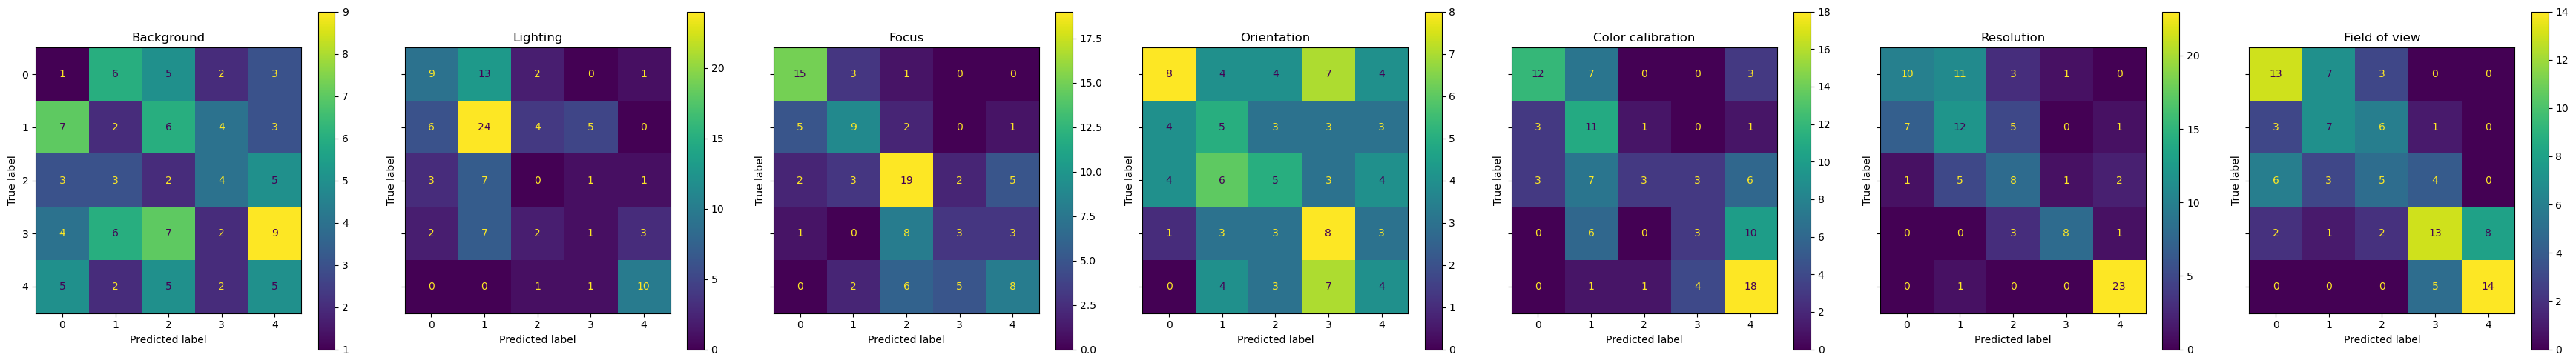


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     11.56      |    12.04     |   0.0568   |   0.0537   |
     Lighting      |     34.25      |    37.51     |   0.5797   |   0.4744   |
      Focus        |     49.60      |    50.25     |   0.6840   |   0.7056   |
   Orientation     |     29.67      |    29.36     |   0.2311   |   0.2221   |
Color calibration  |     47.68      |    45.54     |   0.6625   |   0.6588   |
    Resolution     |     60.85      |    59.51     |   0.8178   |   0.7874   |
  Field of view    |     48.89      |    49.83     |   0.7710   |   0.7776   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9182   |   1.8280   |     41.23      |    41.43     |   0.5547   |   0.5500   |


In [4]:
classifier, pred, val = train_model('f17k', num_distortions=1, crop=False, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, regression=False, track=TRACK)

Loaded features from f17k/embeddings/features_0_crops.npy
Loaded scores from f17k/embeddings/scores_0_crops.npy
Training for label 1
[0]	validation_0-mlogloss:1.62045	validation_0-merror:0.88350	validation_0-auc:0.47904
[1]	validation_0-mlogloss:1.63092	validation_0-merror:0.83495	validation_0-auc:0.44625
[2]	validation_0-mlogloss:1.63076	validation_0-merror:0.82524	validation_0-auc:0.46488
[3]	validation_0-mlogloss:1.63578	validation_0-merror:0.77670	validation_0-auc:0.47040
[4]	validation_0-mlogloss:1.65321	validation_0-merror:0.78641	validation_0-auc:0.44683
[5]	validation_0-mlogloss:1.66052	validation_0-merror:0.76699	validation_0-auc:0.44389
[6]	validation_0-mlogloss:1.66957	validation_0-merror:0.77670	validation_0-auc:0.44268
[7]	validation_0-mlogloss:1.66724	validation_0-merror:0.76699	validation_0-auc:0.46113
[8]	validation_0-mlogloss:1.67086	validation_0-merror:0.80583	validation_0-auc:0.46641
[9]	validation_0-mlogloss:1.67490	validation_0-merror:0.82524	validation_0-auc:0.466

/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:07:38] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


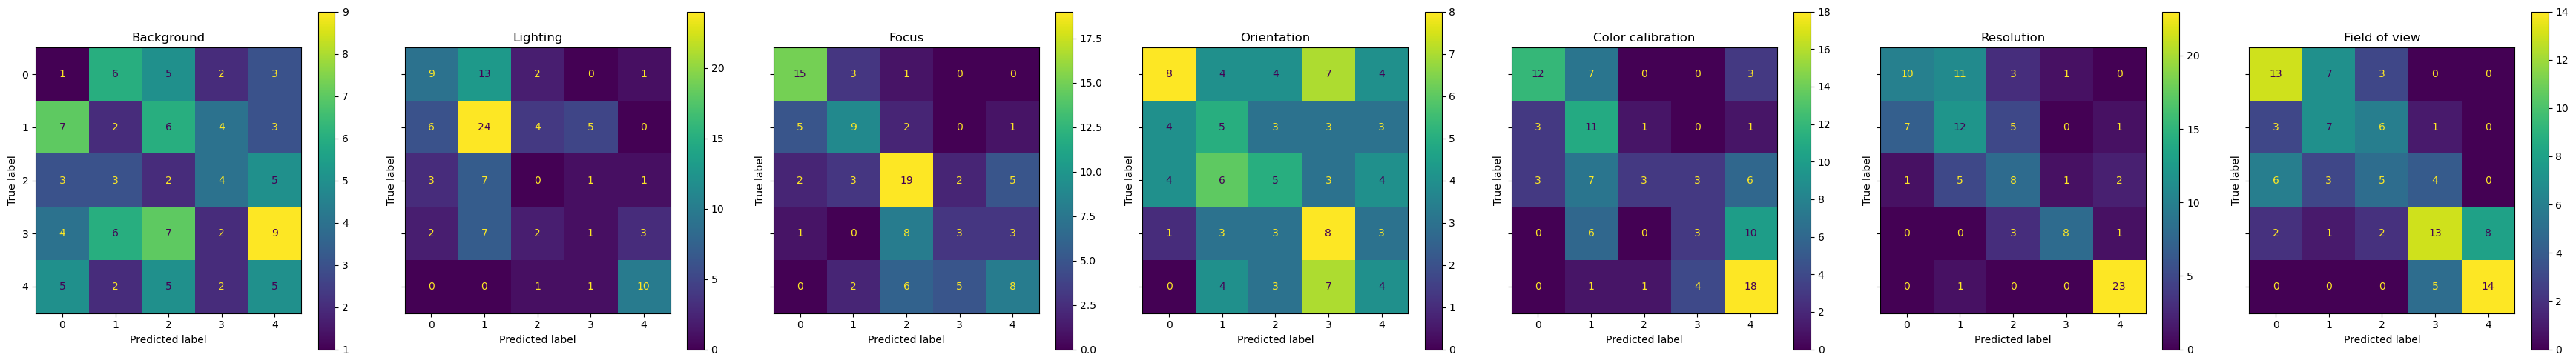


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     11.56      |    12.04     |   0.0568   |   0.0537   |
     Lighting      |     34.25      |    37.51     |   0.5797   |   0.4744   |
      Focus        |     49.60      |    50.25     |   0.6840   |   0.7056   |
   Orientation     |     29.67      |    29.36     |   0.2311   |   0.2221   |
Color calibration  |     47.68      |    45.54     |   0.6625   |   0.6588   |
    Resolution     |     60.85      |    59.51     |   0.8178   |   0.7874   |
  Field of view    |     48.89      |    49.83     |   0.7710   |   0.7776   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9182   |   1.8280   |     41.23      |    41.43     |   0.5547   |   0.5500   |


In [8]:
classifier, pred, val = train_model('f17k', crop=False, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, regression=False, track=TRACK)

Loaded features from f17k/embeddings/features.npy
Loaded scores from f17k/embeddings/scores.npy
Training for label 1
[0]	validation_0-mlogloss:1.60456
[1]	validation_0-mlogloss:1.60800
[2]	validation_0-mlogloss:1.61389
[3]	validation_0-mlogloss:1.61454
[4]	validation_0-mlogloss:1.61479
[5]	validation_0-mlogloss:1.61949
[6]	validation_0-mlogloss:1.62019
[7]	validation_0-mlogloss:1.62363
[8]	validation_0-mlogloss:1.62657
[9]	validation_0-mlogloss:1.62757
Training for label 2
[0]	validation_0-mlogloss:1.60088
[1]	validation_0-mlogloss:1.59457
[2]	validation_0-mlogloss:1.58677
[3]	validation_0-mlogloss:1.58152
[4]	validation_0-mlogloss:1.57665
[5]	validation_0-mlogloss:1.57855
[6]	validation_0-mlogloss:1.57577
[7]	validation_0-mlogloss:1.57109
[8]	validation_0-mlogloss:1.57268
[9]	validation_0-mlogloss:1.57110
[10]	validation_0-mlogloss:1.57020
[11]	validation_0-mlogloss:1.56897
[12]	validation_0-mlogloss:1.56761
[13]	validation_0-mlogloss:1.56506
[14]	validation_0-mlogloss:1.56346
[15]	va

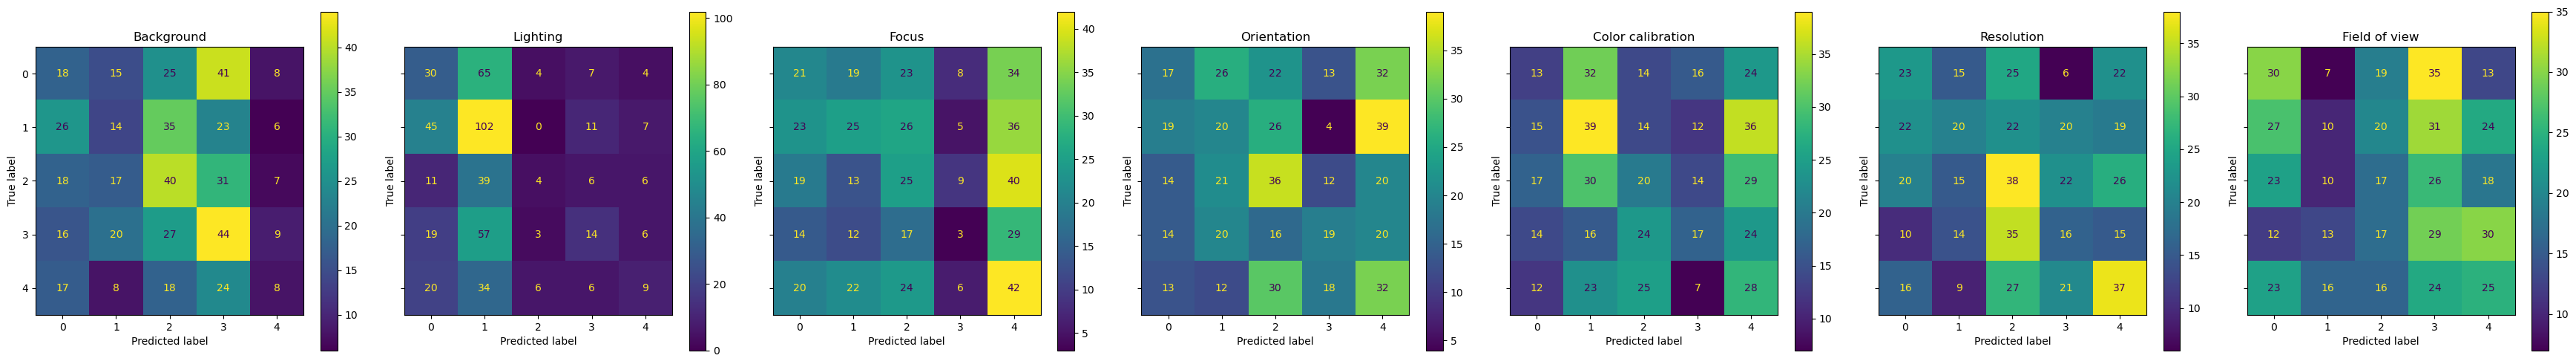


     Criteria      | Precision  |   Recall   |
----------------------------------------------
    Background     |   0.2270   |   0.2286   |
     Lighting      |   0.2836   |   0.2426   |
      Focus        |   0.2075   |   0.2123   |
   Orientation     |   0.2423   |   0.2415   |
Color calibration  |   0.2248   |   0.2246   |
    Resolution     |   0.2569   |   0.2550   |
  Field of view    |   0.2115   |   0.2172   |

MAE             MSE             Precision       Recall         
1.4785          3.6422          0.2441          0.2444         



In [14]:
classifier, pred, val = train_model('f17k', crop=True, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, regression=False)

Loaded features from f17k/embeddings/features_0_crops.npy
Loaded scores from f17k/embeddings/scores_0_crops.npy
Training for label 1
[0]	validation_0-mlogloss:1.61296	validation_0-merror:0.74757
[1]	validation_0-mlogloss:1.62198	validation_0-merror:0.83495
[2]	validation_0-mlogloss:1.61065	validation_0-merror:0.81553
[3]	validation_0-mlogloss:1.60857	validation_0-merror:0.81553
[4]	validation_0-mlogloss:1.59830	validation_0-merror:0.76699
[5]	validation_0-mlogloss:1.60090	validation_0-merror:0.77670
[6]	validation_0-mlogloss:1.60125	validation_0-merror:0.75728
[7]	validation_0-mlogloss:1.60536	validation_0-merror:0.75728
[8]	validation_0-mlogloss:1.61282	validation_0-merror:0.73786
[9]	validation_0-mlogloss:1.61362	validation_0-merror:0.74757
[10]	validation_0-mlogloss:1.61752	validation_0-merror:0.76699
[11]	validation_0-mlogloss:1.62207	validation_0-merror:0.80583
[12]	validation_0-mlogloss:1.63198	validation_0-merror:0.78641
[13]	validation_0-mlogloss:1.63055	validation_0-merror:0.7

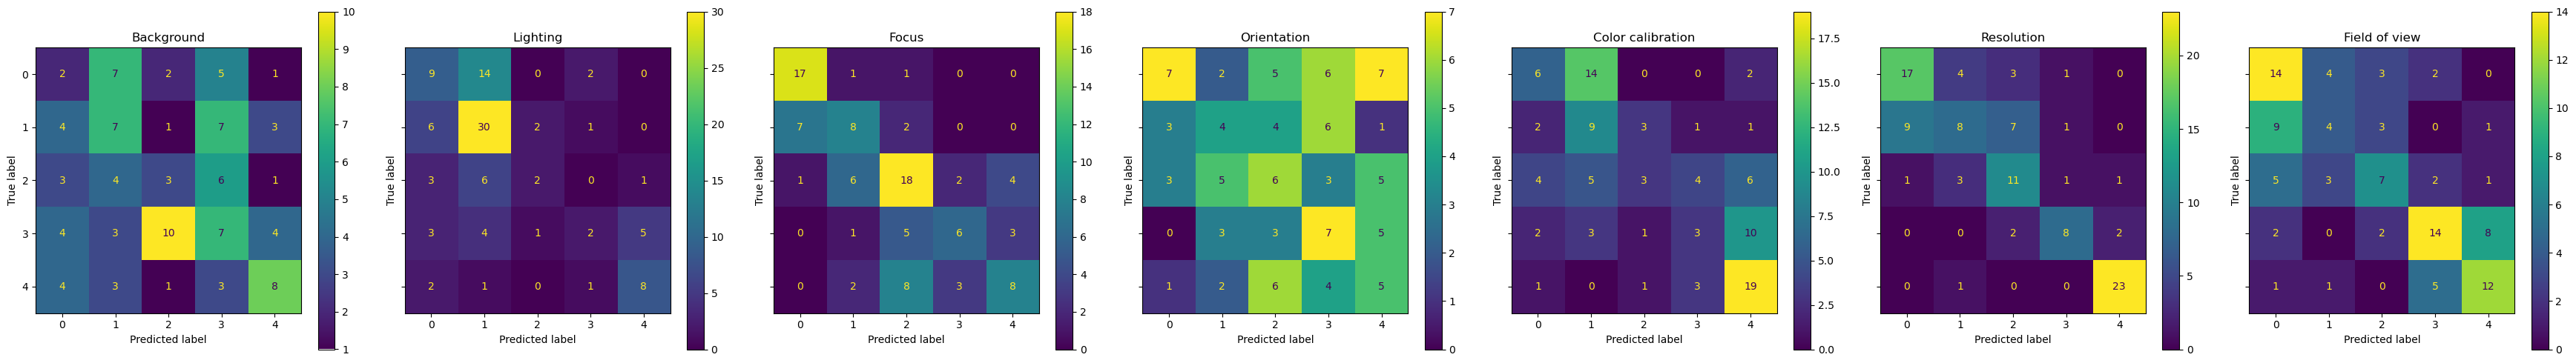


     Criteria      | Precision  |   Recall   |
----------------------------------------------
    Background     |   0.2613   |   0.2567   |
     Lighting      |   0.4483   |   0.4192   |
      Focus        |   0.5465   |   0.5454   |
   Orientation     |   0.2973   |   0.2842   |
Color calibration  |   0.3676   |   0.3842   |
    Resolution     |   0.6440   |   0.6544   |
  Field of view    |   0.4812   |   0.4806   |

MAE             MSE             Precision       Recall         
0.8890          1.8377          0.4436          0.4458         



In [32]:
classifier, pred, val = train_model('f17k', crop=False, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, regression=False)

Loaded features from images/embeddings/features_0_crops.npy
Loaded scores from images/embeddings/scores_0_crops.npy
Training for label 1
[0]	validation_0-mlogloss:1.60629	validation_0-merror:0.78641	validation_0-auc:0.52441
[1]	validation_0-mlogloss:1.60980	validation_0-merror:0.84466	validation_0-auc:0.53974
[2]	validation_0-mlogloss:1.61693	validation_0-merror:0.84466	validation_0-auc:0.52562
[3]	validation_0-mlogloss:1.61655	validation_0-merror:0.82524	validation_0-auc:0.53547
[4]	validation_0-mlogloss:1.59768	validation_0-merror:0.79612	validation_0-auc:0.57695
[5]	validation_0-mlogloss:1.60393	validation_0-merror:0.78641	validation_0-auc:0.56918
[6]	validation_0-mlogloss:1.60843	validation_0-merror:0.78641	validation_0-auc:0.56296
[7]	validation_0-mlogloss:1.61529	validation_0-merror:0.81553	validation_0-auc:0.55325
[8]	validation_0-mlogloss:1.61044	validation_0-merror:0.77670	validation_0-auc:0.56518
[9]	validation_0-mlogloss:1.60763	validation_0-merror:0.78641	validation_0-auc:0

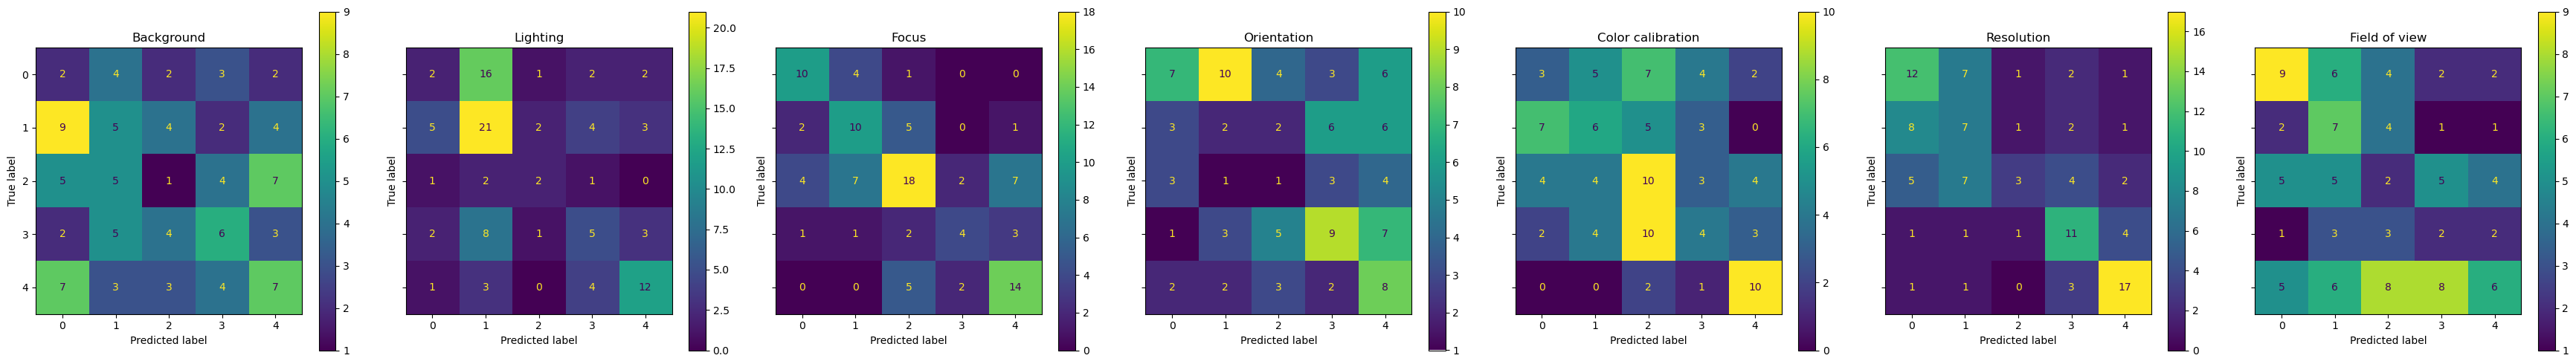


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     19.98      |    19.99     |   0.1013   |   0.1004   |
     Lighting      |     36.95      |    37.67     |   0.4447   |   0.3965   |
      Focus        |     53.67      |    54.52     |   0.6862   |   0.6886   |
   Orientation     |     25.29      |    25.05     |   0.2552   |   0.2541   |
Color calibration  |     31.81      |    35.43     |   0.3822   |   0.3666   |
    Resolution     |     48.58      |    48.34     |   0.6699   |   0.6613   |
  Field of view    |     25.49      |    26.34     |   0.2624   |   0.2651   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  1.1262   |   2.5021   |     35.10      |    35.19     |   0.3863   |   0.3835   |


In [12]:
classifier, pred, val = train_model('images', crop=False, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, regression=False)

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def plot_all_confusion_matrices(y_true, y_pred):
    criteria = ['Background', 'Lighting', 'Focus', 'Orientation', 'Color calibration', 'Resolution', 'Field of view']
    fig, axes = plt.subplots(1, 7, figsize=(35, 5), sharey=True)
    for i, ax in enumerate(axes.flatten()):
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=ax)
        ax.title.set_text(criteria[i])
    plt.tight_layout()
    plt.show()

def print_metrics(y_true, y_pred):
    criteria = ['Background', 'Lighting', 'Focus', 'Orientation', 'Color calibration', 'Resolution', 'Field of view']
    for i, criterion in enumerate(criteria):
        print(f"\n--- {criterion} ---")
        print(classification_report(y_true[:, i], y_pred[:, i]))

#print_metrics(val, pred)
#plot_all_confusion_matrices(val, pred)

Loaded features from features/features.npy
Loaded scores from features/scores.npy
[0]	validation_0-rmse:0.30631
[1]	validation_0-rmse:0.29394
[2]	validation_0-rmse:0.27977
[3]	validation_0-rmse:0.26753
[4]	validation_0-rmse:0.25630
[5]	validation_0-rmse:0.24793
[6]	validation_0-rmse:0.24152
[7]	validation_0-rmse:0.23122
[8]	validation_0-rmse:0.22270
[9]	validation_0-rmse:0.21765
[10]	validation_0-rmse:0.20704
[11]	validation_0-rmse:0.20226
[12]	validation_0-rmse:0.19740
[13]	validation_0-rmse:0.19298
[14]	validation_0-rmse:0.18466
[15]	validation_0-rmse:0.17883
[16]	validation_0-rmse:0.17147
[17]	validation_0-rmse:0.16903
[18]	validation_0-rmse:0.16464
[19]	validation_0-rmse:0.15903
[20]	validation_0-rmse:0.15389
[21]	validation_0-rmse:0.14893
[22]	validation_0-rmse:0.14504
[23]	validation_0-rmse:0.13967
[24]	validation_0-rmse:0.13271
[25]	validation_0-rmse:0.12782
[26]	validation_0-rmse:0.12348
[27]	validation_0-rmse:0.11949
[28]	validation_0-rmse:0.11545
[29]	validation_0-rmse:0.1103

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning

Precision for metric 1: 0.0863, Recall for metric 1: 0.2038
Precision for metric 2: 0.1308, Recall for metric 2: 0.2500
Precision for metric 3: 0.1075, Recall for metric 3: 0.2800
Precision for metric 4: 0.0763, Recall for metric 4: 0.1867
Precision for metric 5: 0.3000, Recall for metric 5: 0.2358
Precision for metric 6: 0.0955, Recall for metric 6: 0.2042
Precision for metric 7: 0.2759, Recall for metric 7: 0.1813

MAE             MSE             SROCC           PLCC            Precision       Recall         
0.2819          0.1788          -0.0252         -0.0208         0.2819          0.2282         

Metric-by-Metric Pearson Correlations: [-0.059, -0.088, 0.0087, -0.1238, 0.0021, 0.0716, 0.0221]
Metric-by-Metric Spearman Correlations: [-0.0597, -0.0591, -0.0007, -0.1518, 0.003, 0.0589, 0.0154] 



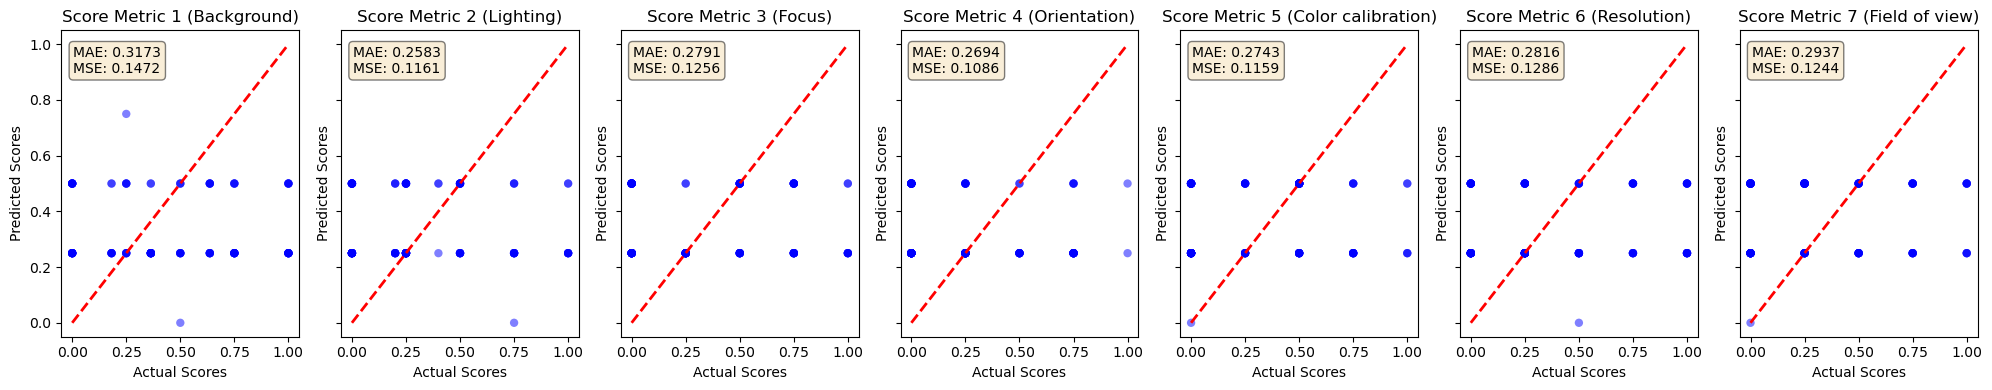

In [4]:
regressor = train_model('images', crop=True, normalize=True, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, save_dir='features', regression=True)

Loaded features from features/features.npy
Loaded scores from features/scores.npy
      Iter       Train Loss   Remaining Time 
         1           0.1000           28.77m
         2           0.0998           30.23m
         3           0.0996           29.87m
         4           0.0994           30.25m
         5           0.0992           30.43m
         6           0.0990           30.16m
         7           0.0989           30.03m
         8           0.0987           29.86m
         9           0.0985           29.59m
        10           0.0983           29.51m
        20           0.0964           28.45m
        30           0.0944           27.54m
        40           0.0926           26.81m
        50           0.0909           26.16m
        60           0.0893           25.64m
        70           0.0877           25.14m
        80           0.0862           24.58m
        90           0.0847           24.03m
       100           0.0834           23.43m
       200       

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning

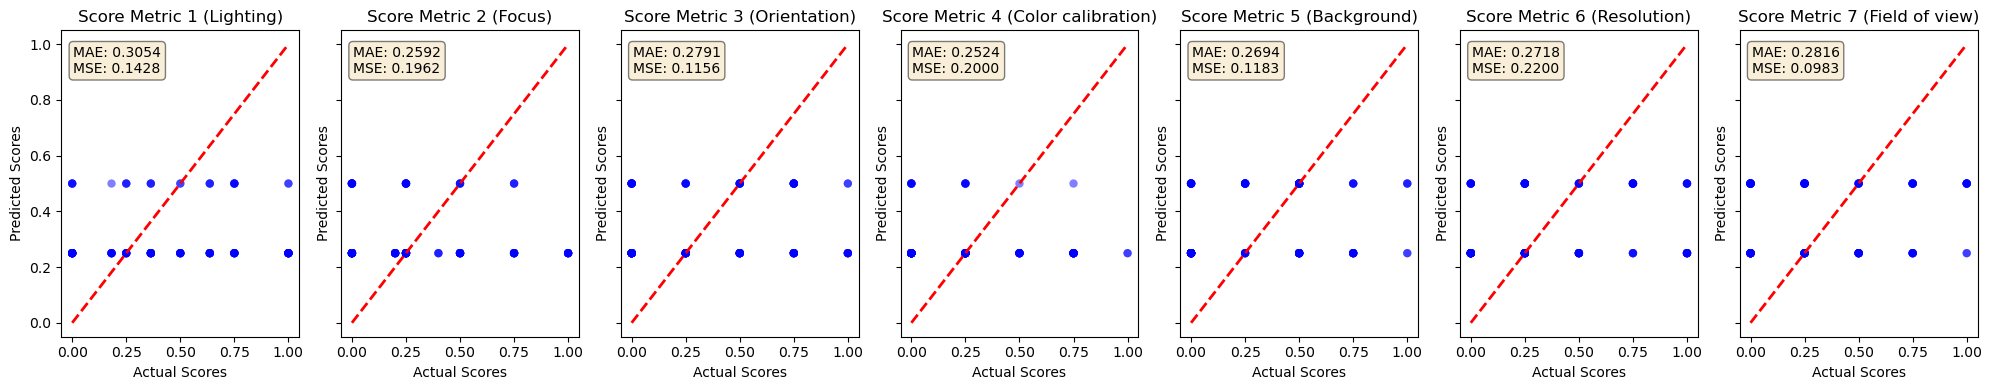

In [6]:
regressor = train_model('images', crop=True, normalize=True, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, save_dir='features', regression=True)

Loaded features from features/features.npy
Loaded scores from features/scores.npy
Iteration 1, loss = 0.06645646
Iteration 2, loss = 0.05318567
Iteration 3, loss = 0.05246623
Iteration 4, loss = 0.05197067
Iteration 5, loss = 0.05158329
Iteration 6, loss = 0.05121623
Iteration 7, loss = 0.05080652
Iteration 8, loss = 0.05067937
Iteration 9, loss = 0.05048359
Iteration 10, loss = 0.05026501
Iteration 11, loss = 0.05017438
Iteration 12, loss = 0.04951114
Iteration 13, loss = 0.04957197
Iteration 14, loss = 0.04906148
Iteration 15, loss = 0.04891207
Iteration 16, loss = 0.04824834
Iteration 17, loss = 0.04799591
Iteration 18, loss = 0.04739810
Iteration 19, loss = 0.04706890
Iteration 20, loss = 0.04683955
Iteration 21, loss = 0.04690953
Iteration 22, loss = 0.04597588
Iteration 23, loss = 0.04528497
Iteration 24, loss = 0.04438335
Iteration 25, loss = 0.04378961
Iteration 26, loss = 0.04358673
Iteration 27, loss = 0.04308897
Iteration 28, loss = 0.04324653
Iteration 29, loss = 0.04258195

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning

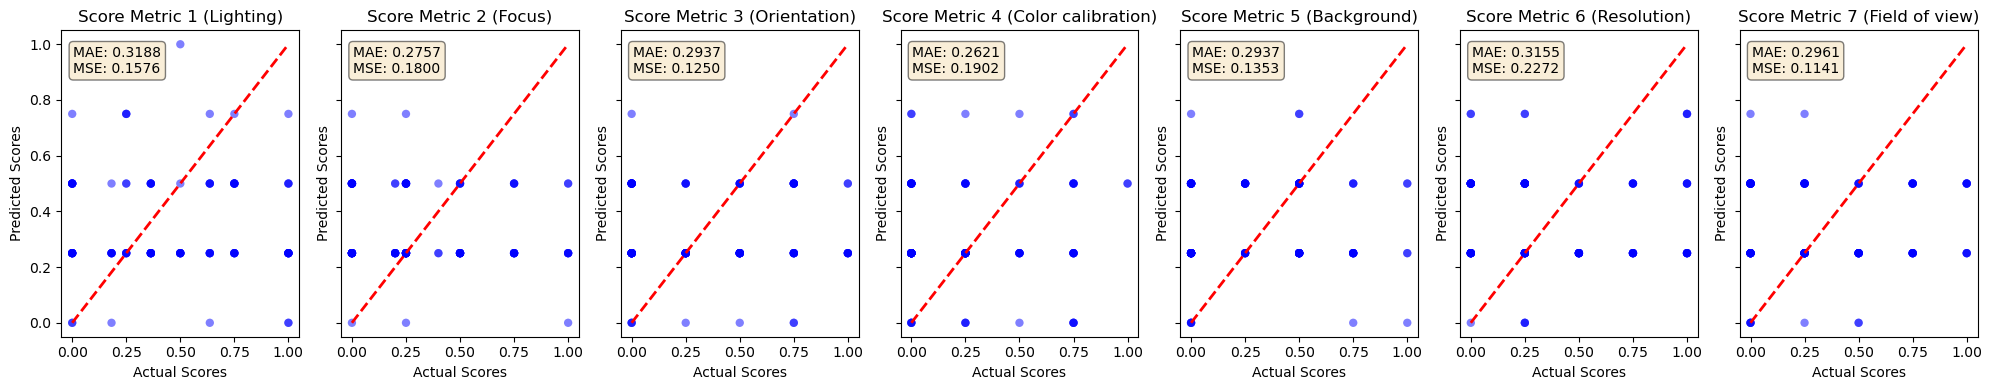

In [9]:
regressor = train_model('images', crop=True, normalize=True, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, save_dir='features', regression=True)

Loaded features from features_f17k/features.npy
Loaded scores from features_f17k/scores.npy
Iteration 1, loss = 0.06492734
Iteration 2, loss = 0.05109556
Iteration 3, loss = 0.05030797
Iteration 4, loss = 0.04984232
Iteration 5, loss = 0.04992703
Iteration 6, loss = 0.04955583
Iteration 7, loss = 0.04930212
Iteration 8, loss = 0.04880720
Iteration 9, loss = 0.04854389
Iteration 10, loss = 0.04847208
Iteration 11, loss = 0.04824554
Iteration 12, loss = 0.04791247
Iteration 13, loss = 0.04742640
Iteration 14, loss = 0.04724784
Iteration 15, loss = 0.04700079
Iteration 16, loss = 0.04688136
Iteration 17, loss = 0.04629276
Iteration 18, loss = 0.04570869
Iteration 19, loss = 0.04518914
Iteration 20, loss = 0.04500023
Iteration 21, loss = 0.04433058
Iteration 22, loss = 0.04383445
Iteration 23, loss = 0.04329617
Iteration 24, loss = 0.04283652
Iteration 25, loss = 0.04198456
Iteration 26, loss = 0.04146306
Iteration 27, loss = 0.04153248
Iteration 28, loss = 0.04183059
Iteration 29, loss = 

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



MAE             MSE             SROCC           PLCC           
0.2940          0.1292          0.0203          0.0301         

Metric-by-Metric Pearson Correlations: [-0.0769, 0.1175, 0.0354, 0.2389, 0.1141, -0.1515, -0.0189]
Metric-by-Metric Spearman Correlations: [-0.0886, 0.1363, 0.0189, 0.2377, 0.1185, -0.0926, -0.0591] 



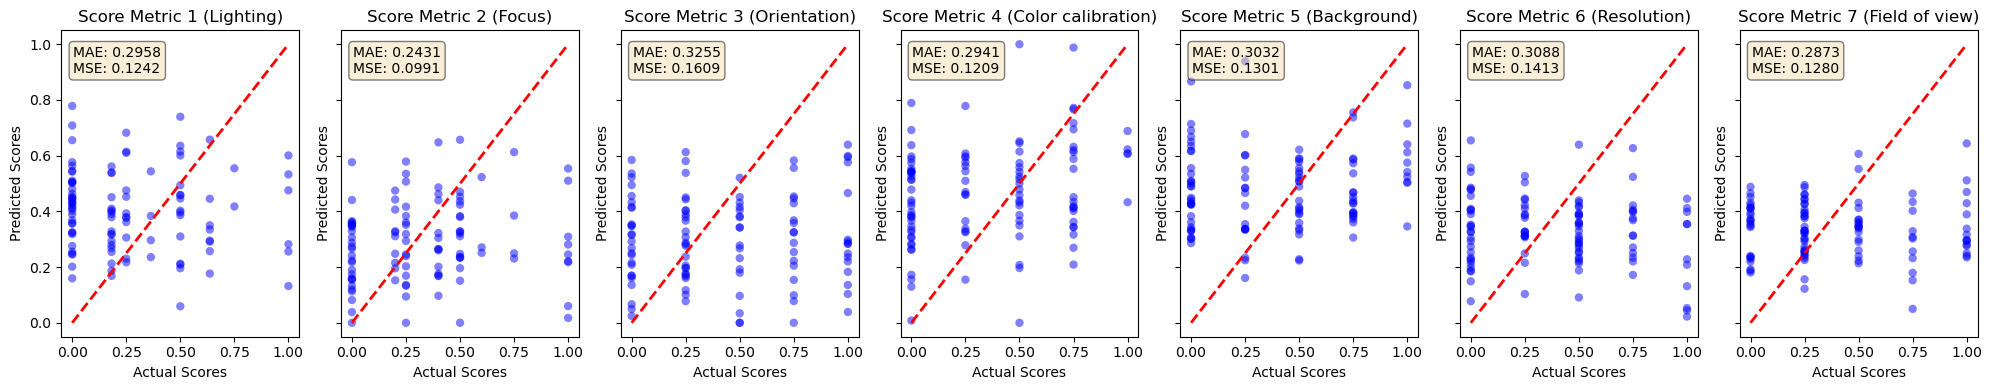

In [5]:
regressor = train_model('f17k', crop=True, normalize=True, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, save_dir='features_f17k', regression=True)

In [10]:
import pickle

with open("classifier_10.pkl", "wb") as f:
    pickle.dump(classifier, f)

Loaded features from to_label/embeddings/features.npy
Loaded scores from to_label/embeddings/scores.npy
Report for Background:
              precision    recall  f1-score   support

     Level 0       0.36      0.32      0.34       355
     Level 1       0.31      0.14      0.19       295
     Level 2       0.20      0.12      0.15       240
     Level 3       0.07      0.07      0.07        95
     Level 4       0.01      0.13      0.01        15

    accuracy                           0.19      1000
   macro avg       0.19      0.16      0.15      1000
weighted avg       0.27      0.19      0.22      1000



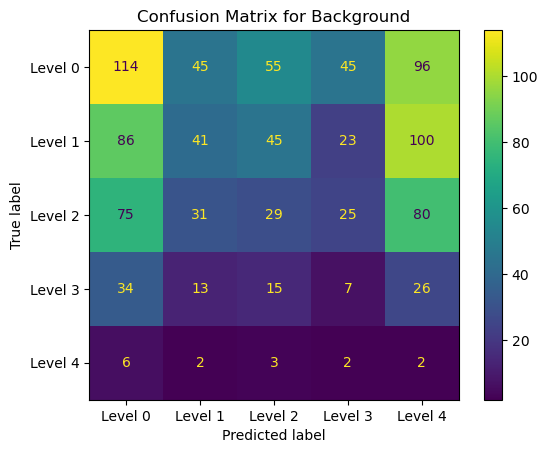

Report for Lighting:
              precision    recall  f1-score   support

     Level 0       0.21      0.01      0.03       275
     Level 1       0.14      0.78      0.23       140
     Level 2       0.46      0.06      0.10       415
     Level 3       0.12      0.03      0.05       145
     Level 4       0.02      0.08      0.04        25

    accuracy                           0.14      1000
   macro avg       0.19      0.19      0.09      1000
weighted avg       0.29      0.14      0.09      1000



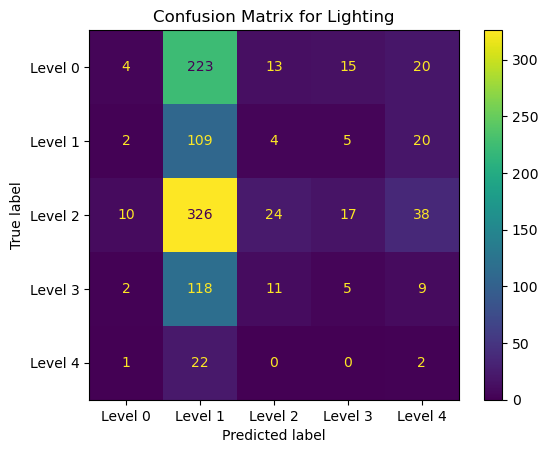

Report for Focus:
              precision    recall  f1-score   support

     Level 0       0.62      0.33      0.43       580
     Level 1       0.39      0.05      0.09       275
     Level 2       0.00      0.00      0.00       115
     Level 3       0.04      0.03      0.03        30
     Level 4       0.00      0.00      0.00         0

    accuracy                           0.20      1000
   macro avg       0.21      0.08      0.11      1000
weighted avg       0.47      0.20      0.27      1000



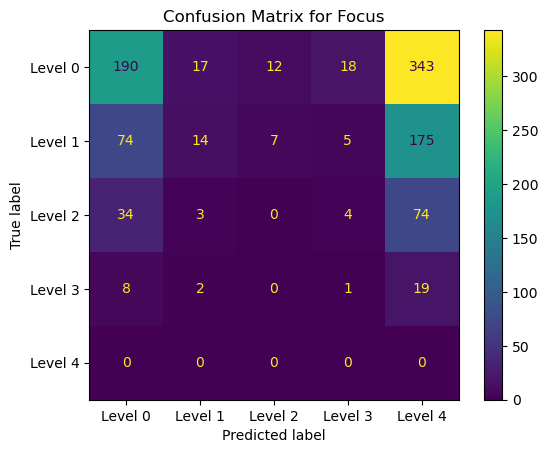

Report for Orientation:
              precision    recall  f1-score   support

     Level 0       0.82      0.28      0.41       810
     Level 1       0.17      0.28      0.21       160
     Level 2       0.02      0.16      0.04        25
     Level 3       0.01      0.20      0.01         5
     Level 4       0.00      0.00      0.00         0

    accuracy                           0.27      1000
   macro avg       0.20      0.18      0.13      1000
weighted avg       0.69      0.27      0.37      1000



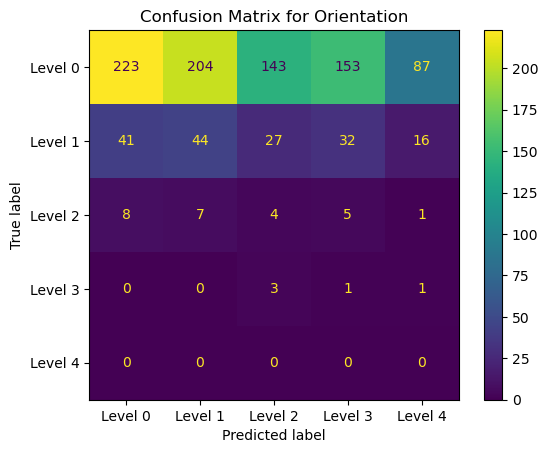

Report for Color calibration:
              precision    recall  f1-score   support

     Level 0       0.73      0.16      0.27       720
     Level 1       0.29      0.17      0.22       175
     Level 2       0.09      0.43      0.15        90
     Level 3       0.02      0.20      0.04        15
     Level 4       0.00      0.00      0.00         0

    accuracy                           0.19      1000
   macro avg       0.23      0.19      0.13      1000
weighted avg       0.58      0.19      0.24      1000



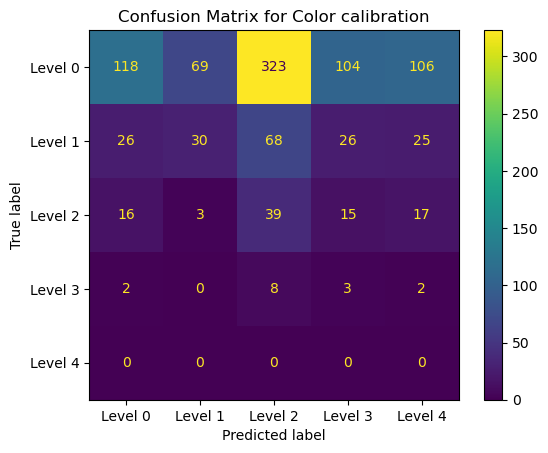

Report for Resolution:
              precision    recall  f1-score   support

     Level 0       0.87      0.99      0.92       865
     Level 1       0.14      0.01      0.01       130
     Level 2       0.00      0.00      0.00         5
     Level 3       0.00      0.00      0.00         0
     Level 4       0.00      0.00      0.00         0

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.20      0.20      0.19      1000
weighted avg       0.77      0.86      0.80      1000



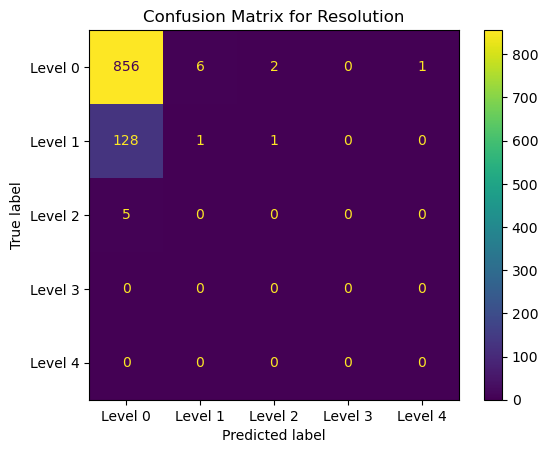

Report for Field of view:
              precision    recall  f1-score   support

     Level 0       0.74      0.63      0.68       745
     Level 1       0.21      0.18      0.19       195
     Level 2       0.05      0.09      0.06        35
     Level 3       0.03      0.12      0.04        25
     Level 4       0.00      0.00      0.00         0

    accuracy                           0.51      1000
   macro avg       0.21      0.20      0.20      1000
weighted avg       0.60      0.51      0.55      1000



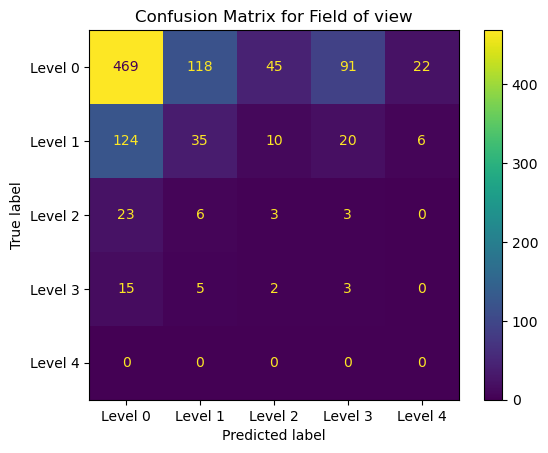

In [28]:
from test import test
test('to_label', crop=True, normalize=True, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, xgb=classifier, regression=False)

Loaded features from features_test/features.npy
Loaded scores from features_test/scores.npy

MAE             MSE             SROCC           PLCC           
0.2451          0.0792          0.0086          -0.0093        

Metric-by-Metric Pearson Correlations: [-0.0694, -0.1082, -0.0772, 0.029, -0.1289, 0.0013, 0.0523]
Metric-by-Metric Spearman Correlations: [-0.0802, -0.1143, -0.0866, 0.0359, -0.0933, -0.0071, 0.0395] 



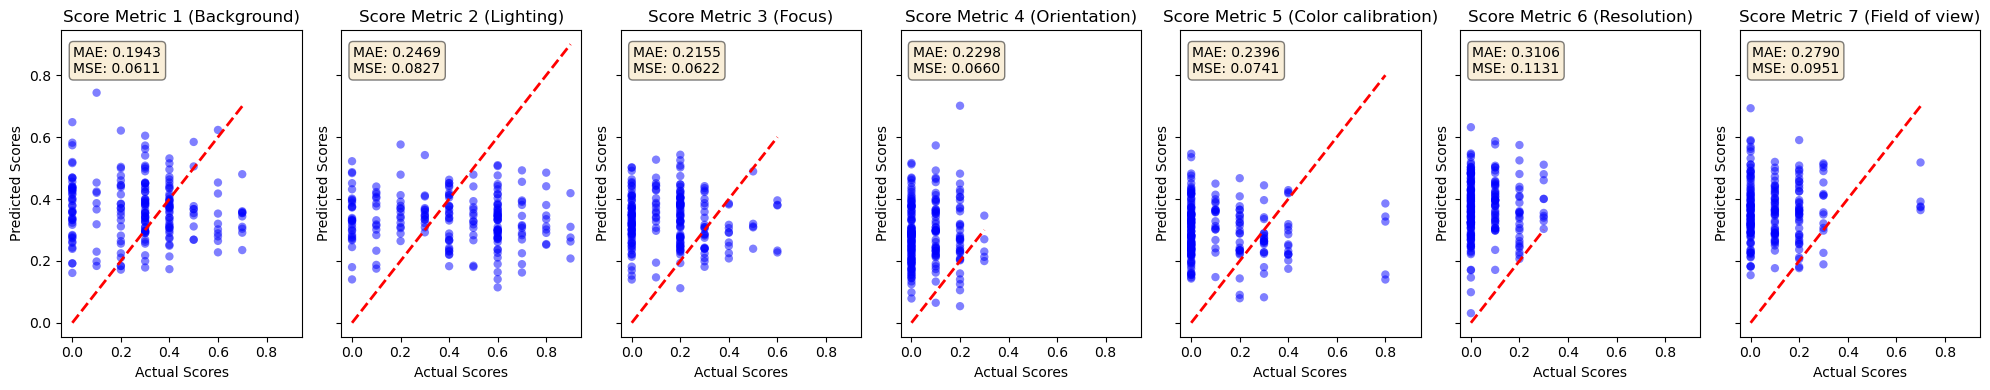

In [5]:
from test import test
test('to_label', crop=True, normalize=True, batch_size=10, num_workers=1, model=arniqa, device=DEVICE, xgb=classifier, regression=True)

Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


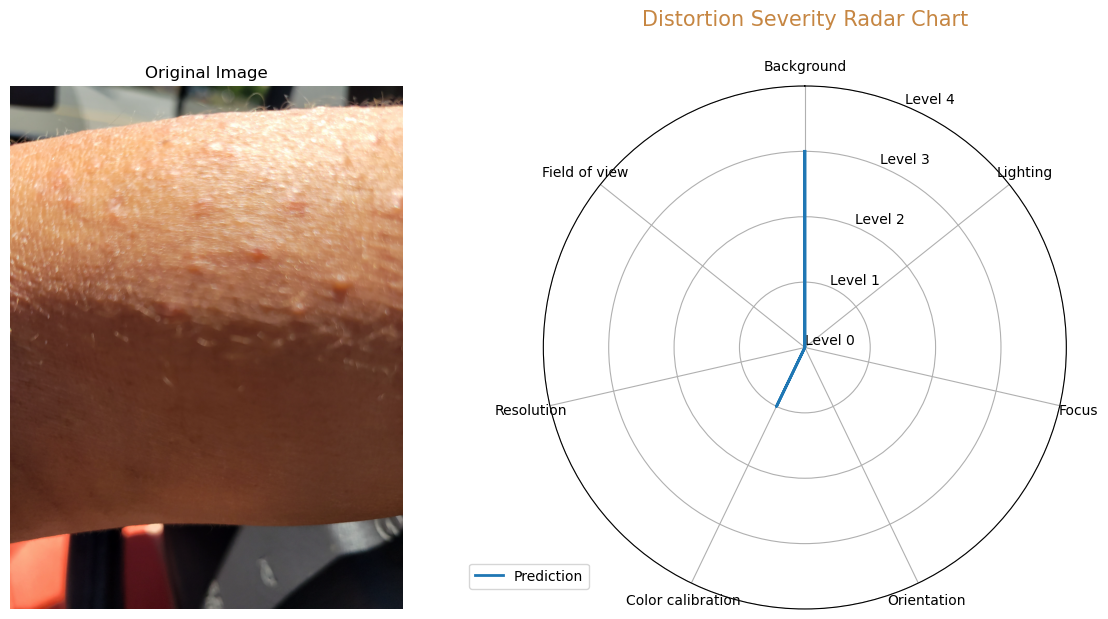

In [11]:
import torch
import pickle
from single_image_inference import single_image_inference

image_path = "2.png"

arniqa = torch.hub.load(repo_or_dir="miccunifi/ARNIQA", source="github", model="ARNIQA")
arniqa.eval()

#with open("regressor1.pkl", "rb") as f:
    #regressor = pickle.load(f)

single_image_inference(image_path, arniqa, classifier, regression=False)

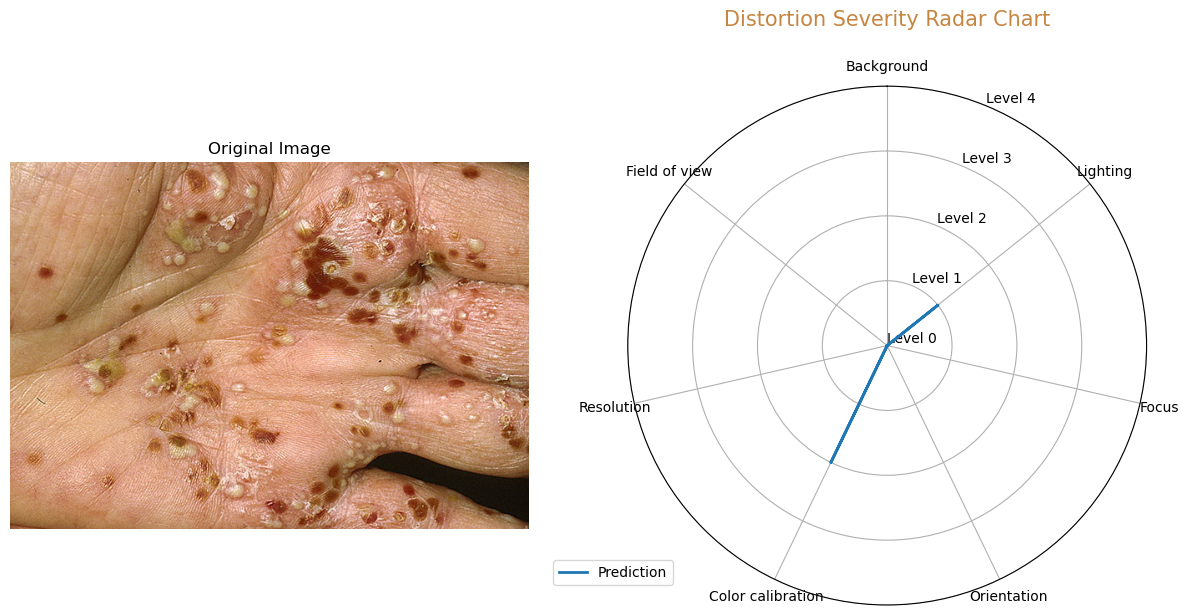

In [12]:
image_path = "1.jpg"
single_image_inference(image_path, arniqa, classifier)

In [16]:
from scipy import stats

def calculate_correlations(predictions, actual_scores):
    pearson_correlations = []
    spearman_correlations = []
    
    # Iterate over each score metric
    for i in range(predictions.shape[1]):
        # Pearson correlation
        pearson_corr, _ = stats.pearsonr(predictions[:, i], actual_scores[:, i])
        pearson_correlations.append(pearson_corr)
        
        # Spearman correlation
        spearman_corr, _ = stats.spearmanr(predictions[:, i], actual_scores[:, i])
        spearman_correlations.append(spearman_corr)
        
        # Print the correlation values for each metric
        print(f"Metric {i+1} - Pearson Correlation: {pearson_corr:.4f}, Spearman Correlation: {spearman_corr:.4f}")
    
    return pearson_correlations, spearman_correlations

pearson_correlations, spearman_correlations = calculate_correlations(pred, val)

Metric 1 - Pearson Correlation: 0.0622, Spearman Correlation: 0.0966
Metric 2 - Pearson Correlation: -0.0904, Spearman Correlation: -0.0729
Metric 3 - Pearson Correlation: 0.0139, Spearman Correlation: -0.0428
Metric 4 - Pearson Correlation: 0.0283, Spearman Correlation: 0.0444
Metric 5 - Pearson Correlation: 0.0514, Spearman Correlation: -0.0076
Metric 6 - Pearson Correlation: -0.0130, Spearman Correlation: 0.0089
Metric 7 - Pearson Correlation: 0.0573, Spearman Correlation: 0.0539


LR: 
Mean Absolute Error: 0.2177400775970633
Mean Squarred Error: 0.08733567035093213

# Sweep many num distortions

Create sweep with ID: qqh9hog7
Sweep URL: https://wandb.ai/choekyel-hslu/BAA/sweeps/qqh9hog7


wandb: Agent Starting Run: k0pxpl6z with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 50
wandb: 	num_distortions: 2
wandb: 	root: f17k
wandb: 	subsample: 1


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_2.npy
Loaded scores from f17k/embeddings/scores_2.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


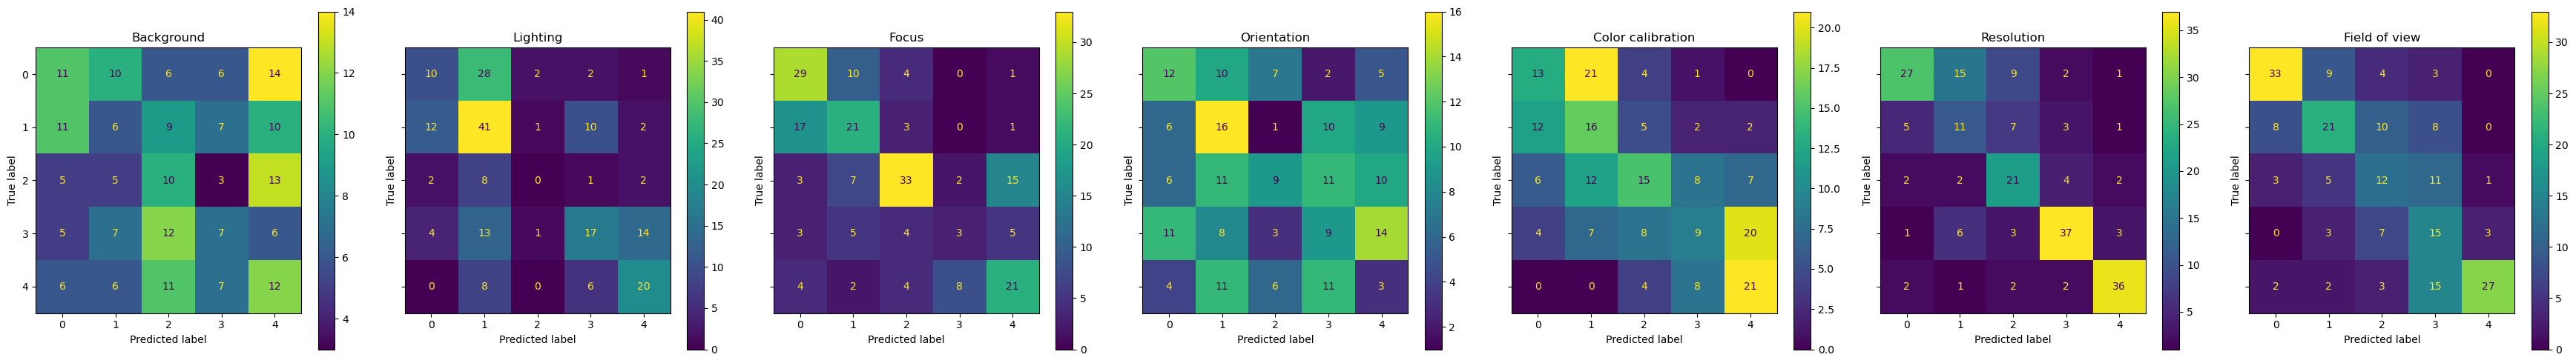


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     22.52      |    22.53     |   0.0631   |   0.0613   |
     Lighting      |     35.21      |    35.78     |   0.5726   |   0.5403   |
      Focus        |     47.82      |    47.95     |   0.6252   |   0.6388   |
   Orientation     |     24.44      |    23.83     |   0.1194   |   0.1166   |
Color calibration  |     36.30      |    38.04     |   0.6538   |   0.6522   |
    Resolution     |     63.04      |    63.24     |   0.7394   |   0.7483   |
  Field of view    |     54.70      |    51.64     |   0.7324   |   0.7345   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9624   |   2.0341   |     42.30      |    42.01     |   0.5017   |   0.5005   |


wandb: Agent Starting Run: eo7a11ej with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 50
wandb: 	num_distortions: 2
wandb: 	root: f17k
wandb: 	subsample: 0.7


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_2.npy
Loaded scores from f17k/embeddings/scores_2.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


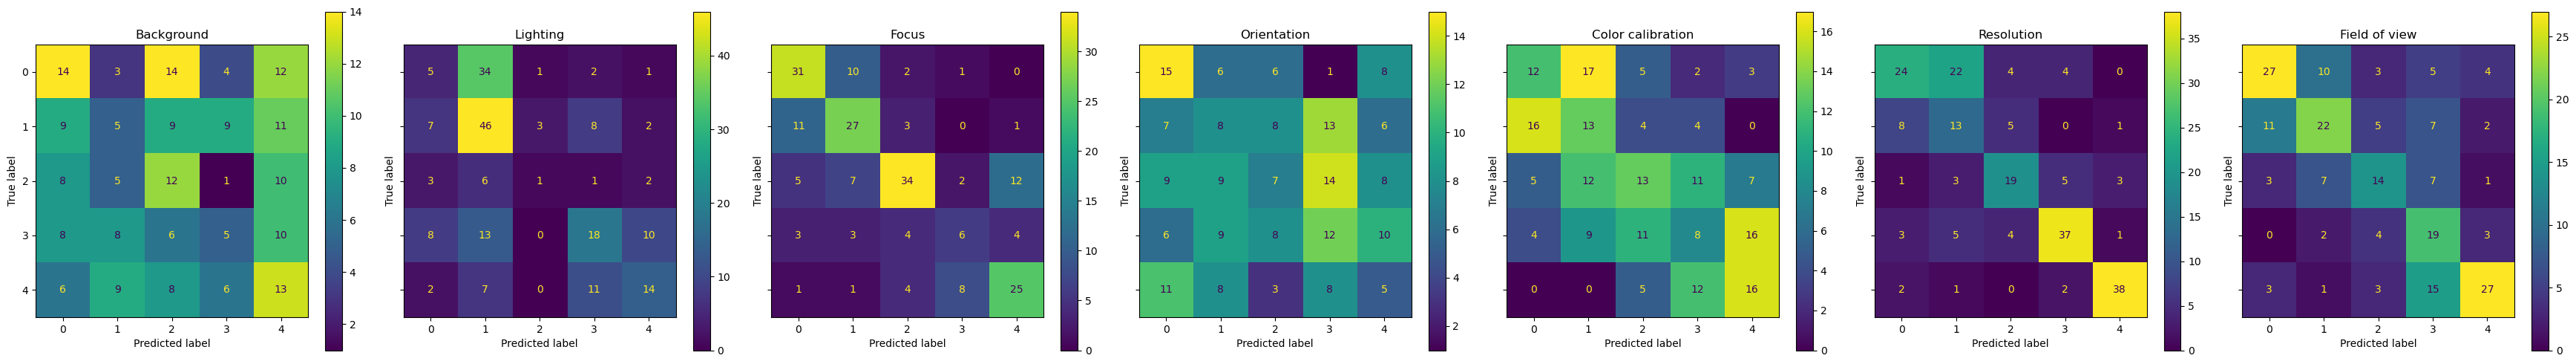


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     23.10      |    23.84     |   0.0501   |   0.0497   |
     Lighting      |     35.33      |    33.39     |   0.4823   |   0.4252   |
      Focus        |     56.84      |    57.10     |   0.7286   |   0.7340   |
   Orientation     |     22.33      |    23.31     |   0.0554   |   0.0556   |
Color calibration  |     30.37      |    31.63     |   0.5616   |   0.5653   |
    Resolution     |     63.51      |    63.25     |   0.7579   |   0.7614   |
  Field of view    |     54.17      |    53.72     |   0.6381   |   0.6284   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9868   |   2.1659   |     42.42      |    42.13     |   0.4678   |   0.4641   |


wandb: Agent Starting Run: c36jozcm with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 50
wandb: 	num_distortions: 5
wandb: 	root: f17k
wandb: 	subsample: 1


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_5.npy
Loaded scores from f17k/embeddings/scores_5.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


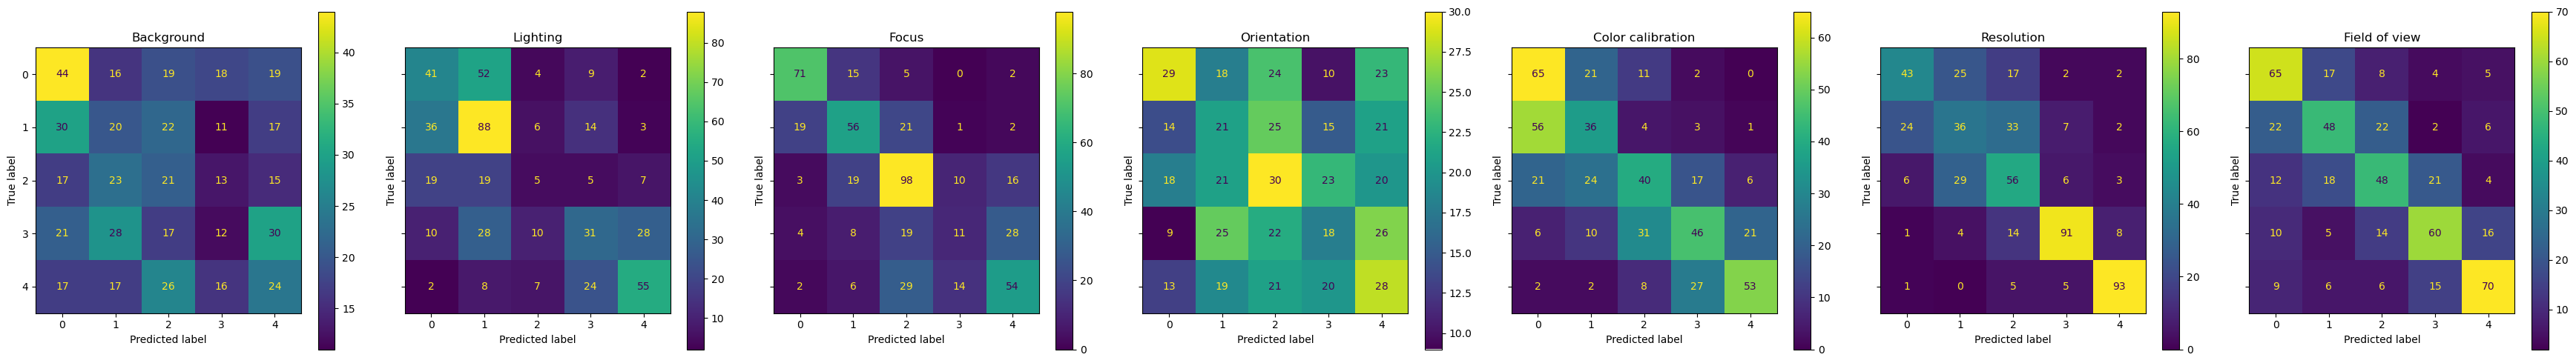


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     22.67      |    23.33     |   0.1432   |   0.1482   |
     Lighting      |     38.79      |    38.64     |   0.6126   |   0.5806   |
      Focus        |     53.21      |    53.44     |   0.7056   |   0.7218   |
   Orientation     |     24.88      |    24.45     |   0.1209   |   0.1191   |
Color calibration  |     47.69      |    47.33     |   0.7419   |   0.7405   |
    Resolution     |     61.70      |    61.23     |   0.7900   |   0.8002   |
  Field of view    |     56.65      |    56.69     |   0.6436   |   0.6429   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.8997   |   1.8800   |     44.95      |    44.83     |   0.5310   |   0.5304   |


wandb: Agent Starting Run: 2xaravth with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 50
wandb: 	num_distortions: 5
wandb: 	root: f17k
wandb: 	subsample: 0.7


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_5.npy
Loaded scores from f17k/embeddings/scores_5.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


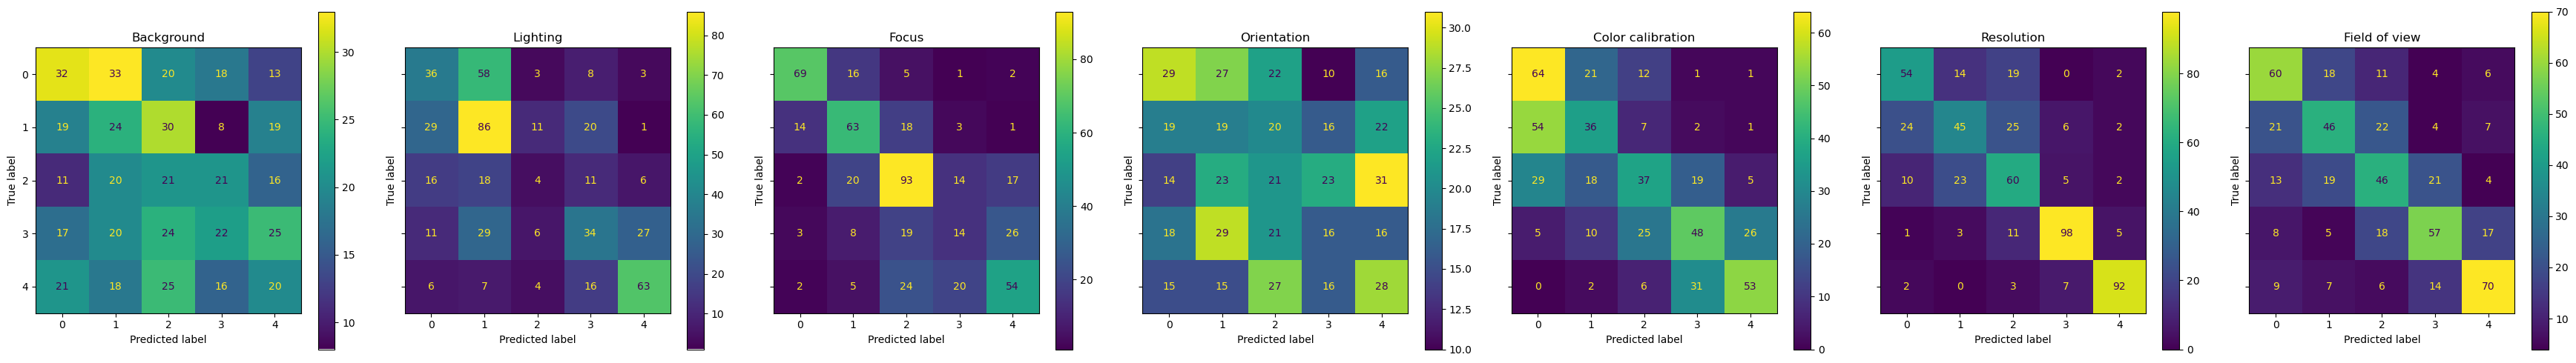


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     23.55      |    23.11     |   0.1276   |   0.1284   |
     Lighting      |     39.13      |    39.30     |   0.5887   |   0.5533   |
      Focus        |     54.47      |    54.59     |   0.7161   |   0.7301   |
   Orientation     |     22.16      |    22.03     |   0.1176   |   0.1176   |
Color calibration  |     47.03      |    46.92     |   0.7496   |   0.7479   |
    Resolution     |     67.39      |    67.26     |   0.8077   |   0.8192   |
  Field of view    |     54.29      |    54.32     |   0.6180   |   0.6182   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.8970   |   1.8716   |     45.16      |    45.00     |   0.5300   |   0.5287   |


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rrikb31w with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 100
wandb: 	num_distortions: 2
wandb: 	root: f17k
wandb: 	subsample: 1


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_2.npy
Loaded scores from f17k/embeddings/scores_2.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


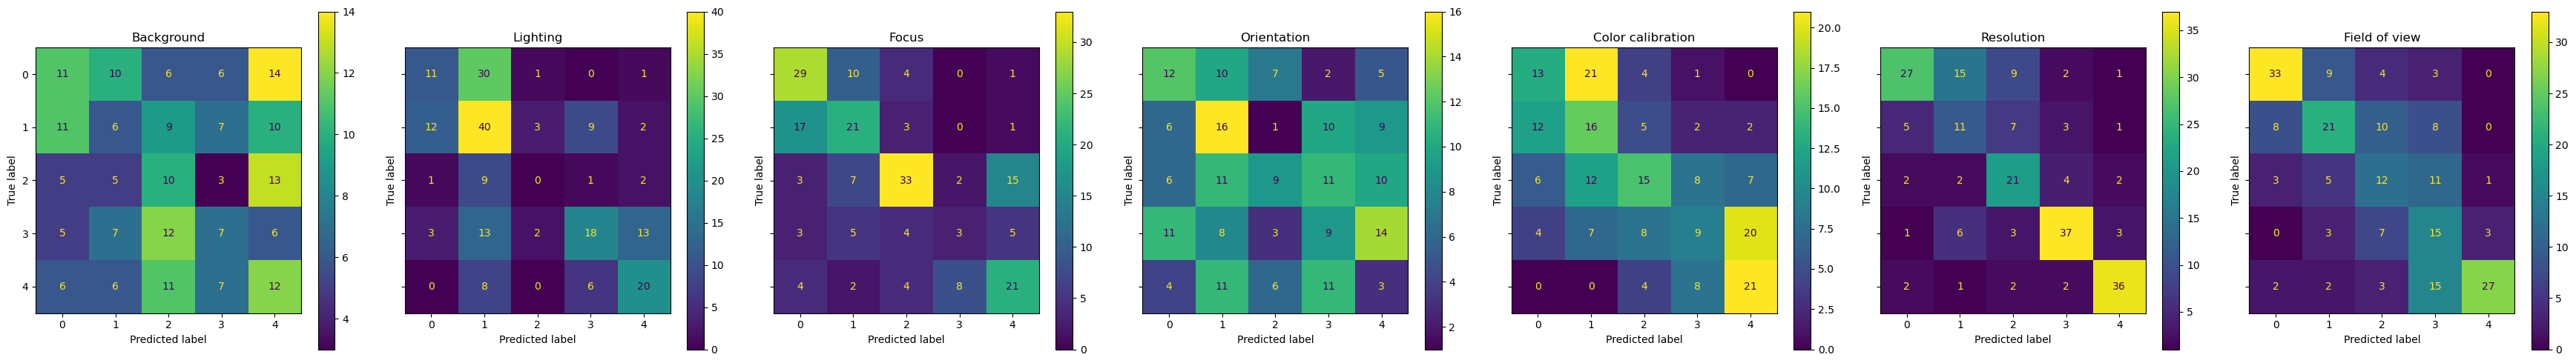


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     22.52      |    22.53     |   0.0631   |   0.0613   |
     Lighting      |     37.26      |    36.35     |   0.6105   |   0.5846   |
      Focus        |     47.82      |    47.95     |   0.6252   |   0.6388   |
   Orientation     |     24.44      |    23.83     |   0.1194   |   0.1166   |
Color calibration  |     36.30      |    38.04     |   0.6538   |   0.6522   |
    Resolution     |     63.04      |    63.24     |   0.7394   |   0.7483   |
  Field of view    |     54.70      |    51.64     |   0.7324   |   0.7345   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9554   |   2.0105   |     42.41      |    42.08     |   0.5068   |   0.5058   |


wandb: Agent Starting Run: t6q3k4vi with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 100
wandb: 	num_distortions: 2
wandb: 	root: f17k
wandb: 	subsample: 0.7


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_2.npy
Loaded scores from f17k/embeddings/scores_2.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


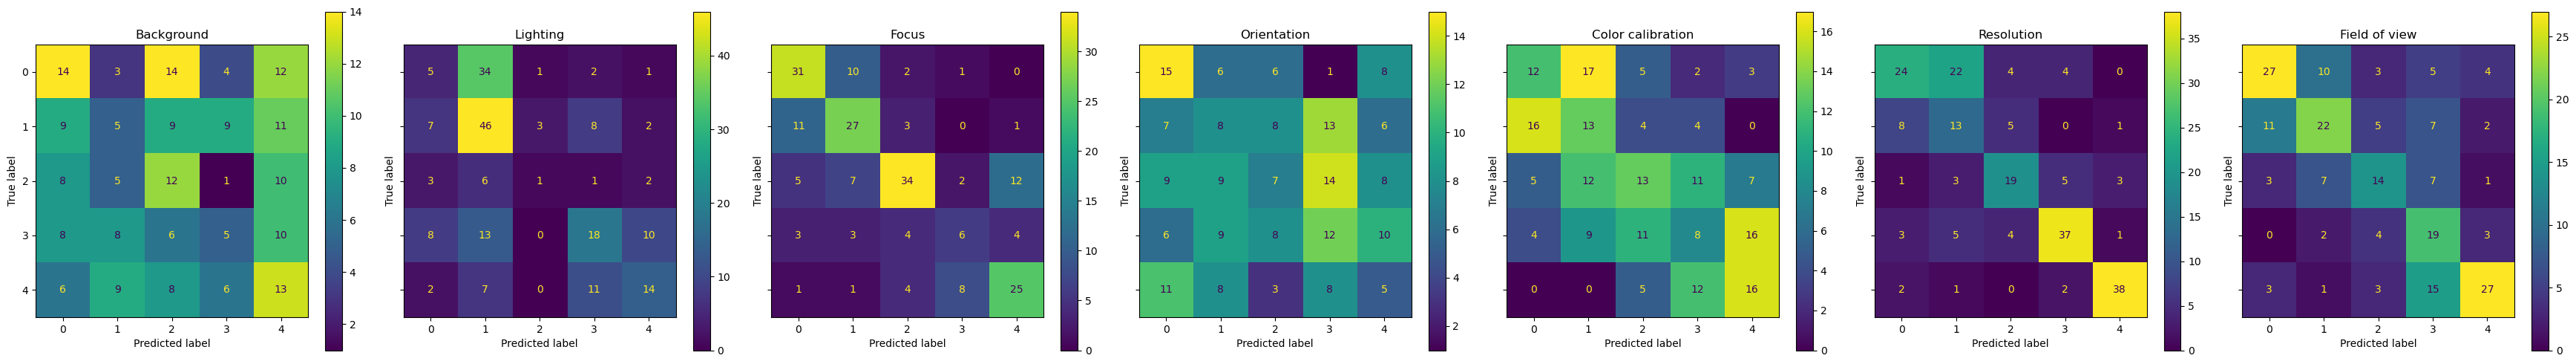


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     23.10      |    23.84     |   0.0501   |   0.0497   |
     Lighting      |     35.33      |    33.39     |   0.4823   |   0.4252   |
      Focus        |     56.84      |    57.10     |   0.7286   |   0.7340   |
   Orientation     |     22.33      |    23.31     |   0.0554   |   0.0556   |
Color calibration  |     30.37      |    31.63     |   0.5616   |   0.5653   |
    Resolution     |     63.51      |    63.25     |   0.7579   |   0.7614   |
  Field of view    |     54.17      |    53.72     |   0.6381   |   0.6284   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9868   |   2.1659   |     42.42      |    42.13     |   0.4678   |   0.4641   |


wandb: Agent Starting Run: l4mkamac with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 100
wandb: 	num_distortions: 5
wandb: 	root: f17k
wandb: 	subsample: 1


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_5.npy
Loaded scores from f17k/embeddings/scores_5.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


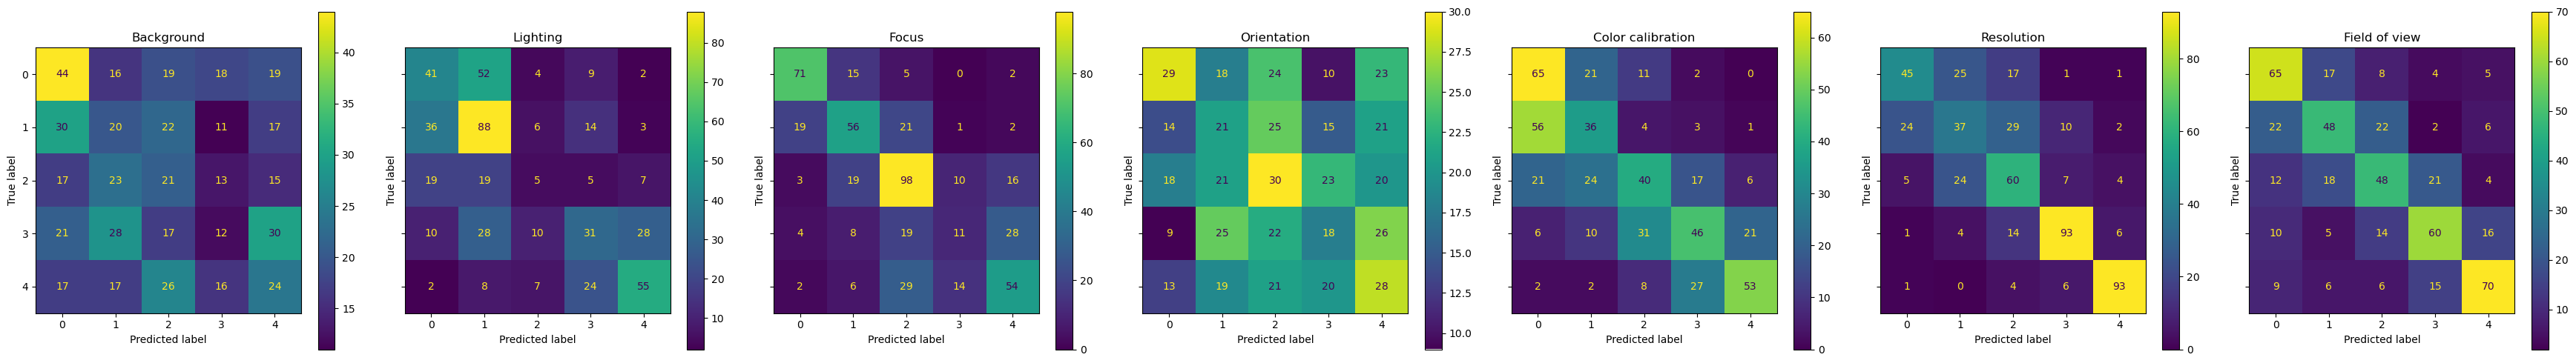


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     22.67      |    23.33     |   0.1432   |   0.1482   |
     Lighting      |     38.79      |    38.64     |   0.6126   |   0.5806   |
      Focus        |     53.21      |    53.44     |   0.7056   |   0.7218   |
   Orientation     |     24.88      |    24.45     |   0.1209   |   0.1191   |
Color calibration  |     47.69      |    47.33     |   0.7419   |   0.7405   |
    Resolution     |     63.19      |    63.01     |   0.8036   |   0.8140   |
  Field of view    |     56.65      |    56.69     |   0.6436   |   0.6429   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.8964   |   1.8727   |     45.18      |    45.08     |   0.5327   |   0.5322   |


wandb: Agent Starting Run: 0r5y5sdv with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3
wandb: 	n_estimators: 100
wandb: 	num_distortions: 5
wandb: 	root: f17k
wandb: 	subsample: 0.7


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_5.npy
Loaded scores from f17k/embeddings/scores_5.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


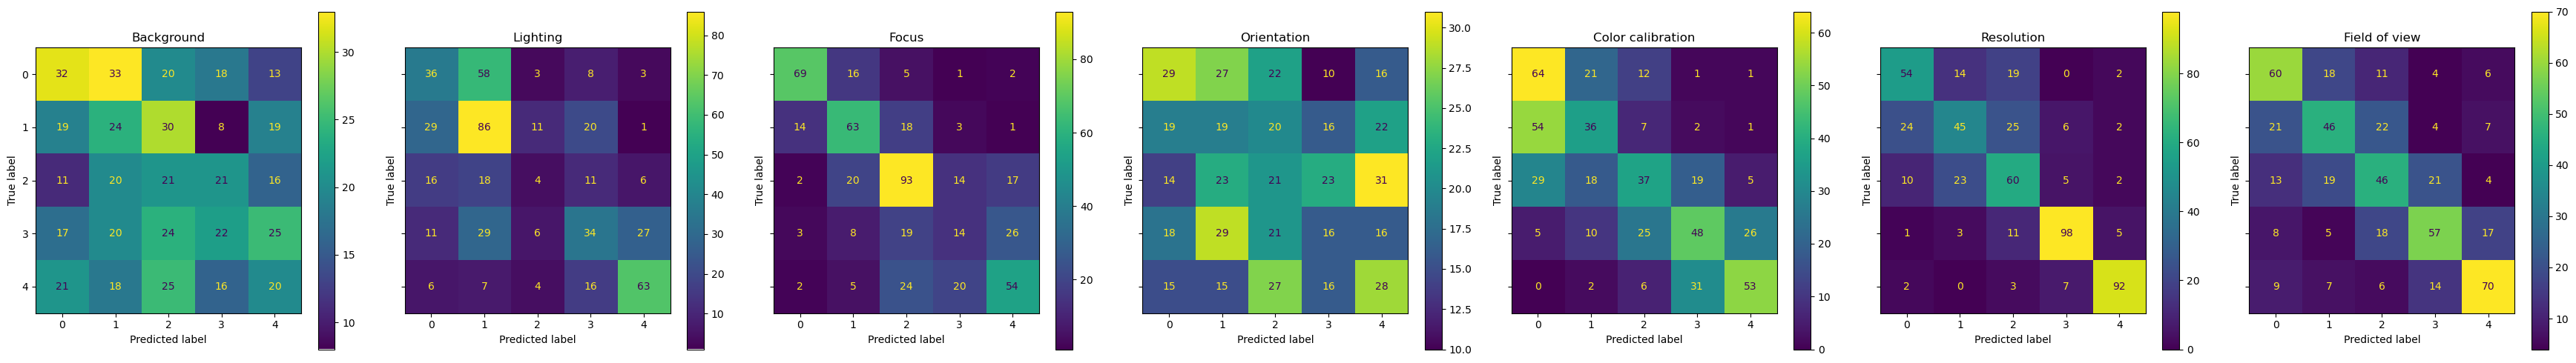


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     23.55      |    23.11     |   0.1276   |   0.1284   |
     Lighting      |     39.13      |    39.30     |   0.5887   |   0.5533   |
      Focus        |     54.47      |    54.59     |   0.7161   |   0.7301   |
   Orientation     |     22.16      |    22.03     |   0.1176   |   0.1176   |
Color calibration  |     47.03      |    46.92     |   0.7496   |   0.7479   |
    Resolution     |     67.39      |    67.26     |   0.8077   |   0.8192   |
  Field of view    |     54.29      |    54.32     |   0.6180   |   0.6182   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.8970   |   1.8716   |     45.16      |    45.00     |   0.5300   |   0.5287   |


wandb: Agent Starting Run: zi1xkc55 with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 6
wandb: 	n_estimators: 50
wandb: 	num_distortions: 2
wandb: 	root: f17k
wandb: 	subsample: 1


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_2.npy
Loaded scores from f17k/embeddings/scores_2.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


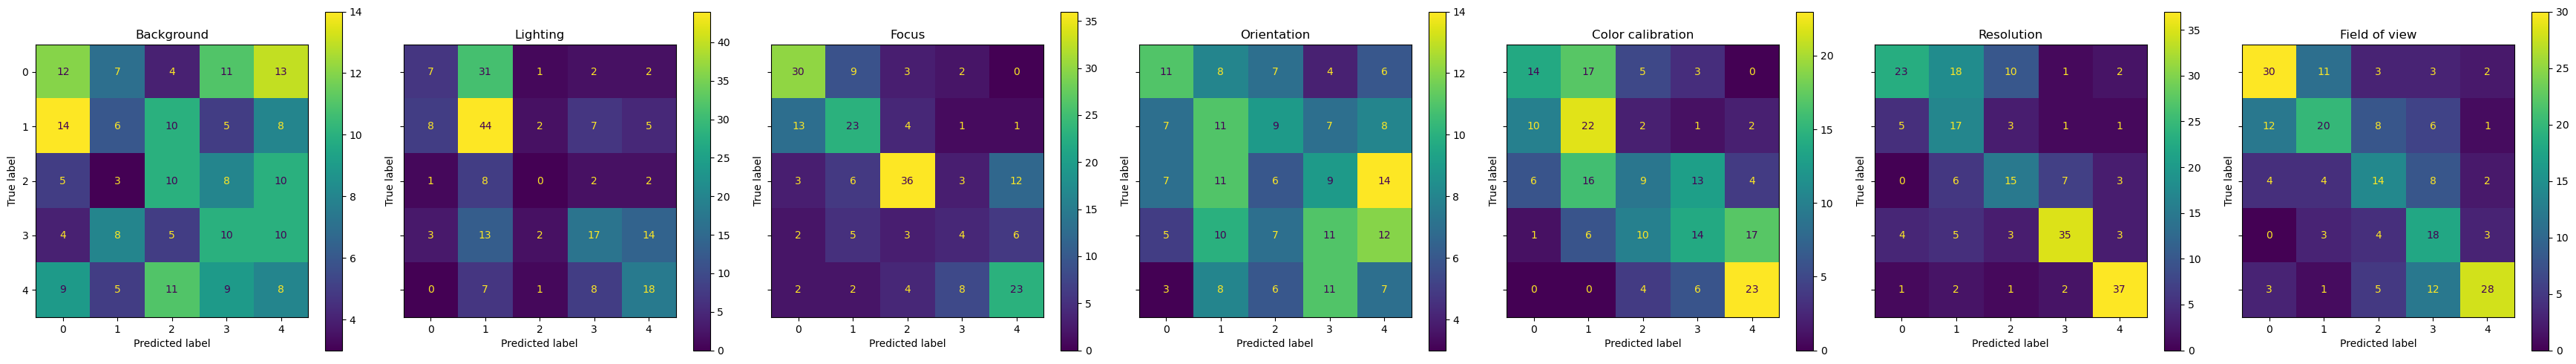


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     22.51      |    22.67     |   0.0477   |   0.0386   |
     Lighting      |     34.14      |    34.12     |   0.5479   |   0.5269   |
      Focus        |     52.02      |    52.38     |   0.6819   |   0.6922   |
   Orientation     |     22.90      |    22.79     |   0.1720   |   0.1689   |
Color calibration  |     39.81      |    42.59     |   0.6812   |   0.6864   |
    Resolution     |     61.70      |    62.00     |   0.7213   |   0.7241   |
  Field of view    |     53.95      |    53.79     |   0.6871   |   0.6823   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9470   |   2.0091   |     42.89      |    42.63     |   0.5063   |   0.5047   |


wandb: Agent Starting Run: z8v3frub with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 6
wandb: 	n_estimators: 50
wandb: 	num_distortions: 2
wandb: 	root: f17k
wandb: 	subsample: 0.7


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_2.npy
Loaded scores from f17k/embeddings/scores_2.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


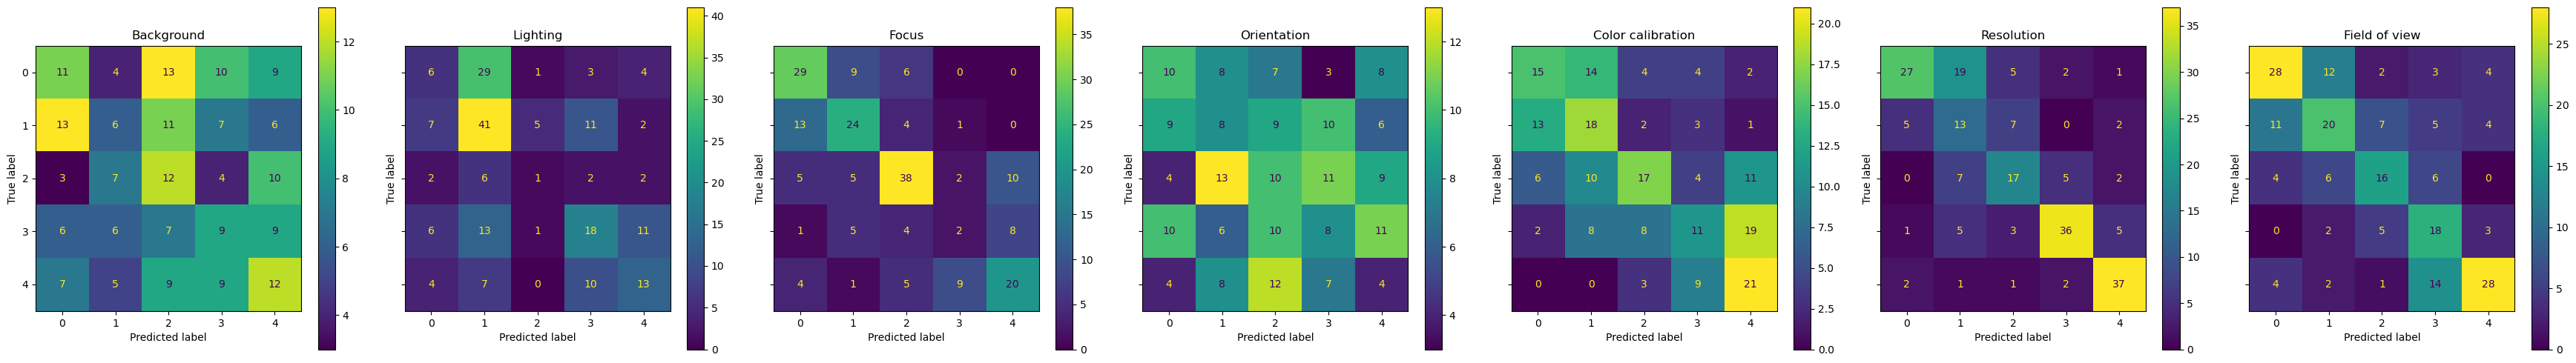


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     24.23      |    24.72     |   0.1134   |   0.1110   |
     Lighting      |     32.15      |    31.75     |   0.3879   |   0.3481   |
      Focus        |     48.78      |    49.53     |   0.6703   |   0.6779   |
   Orientation     |     19.50      |    19.46     |   0.0638   |   0.0652   |
Color calibration  |     40.41      |    41.82     |   0.6176   |   0.6209   |
    Resolution     |     63.25      |    62.21     |   0.7690   |   0.7709   |
  Field of view    |     53.95      |    54.22     |   0.6338   |   0.6251   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.9763   |   2.1261   |     42.27      |    42.13     |   0.4735   |   0.4715   |


wandb: Agent Starting Run: yikhs6yu with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 6
wandb: 	n_estimators: 50
wandb: 	num_distortions: 5
wandb: 	root: f17k
wandb: 	subsample: 1


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_5.npy
Loaded scores from f17k/embeddings/scores_5.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


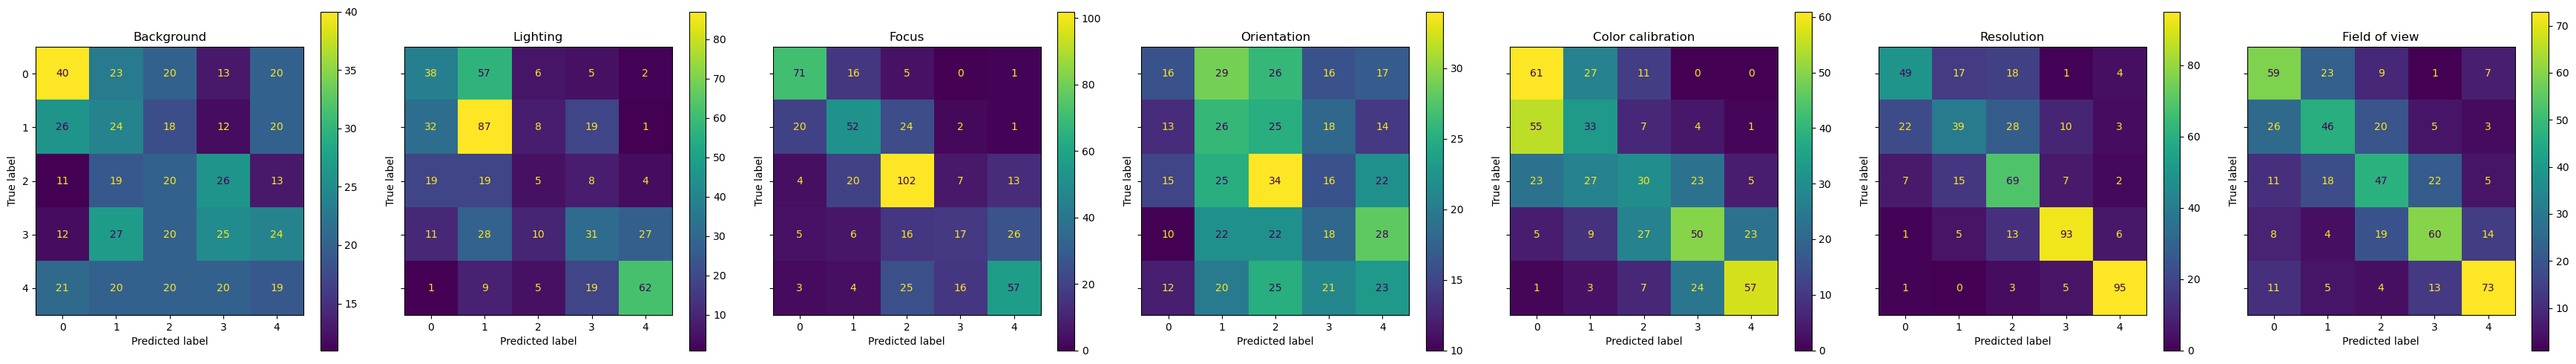


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     24.77      |    24.62     |   0.1295   |   0.1317   |
     Lighting      |     39.64      |    39.40     |   0.6296   |   0.5931   |
      Focus        |     55.99      |    55.46     |   0.7302   |   0.7407   |
   Orientation     |     22.73      |    22.72     |   0.1118   |   0.1126   |
Color calibration  |     45.55      |    45.64     |   0.7509   |   0.7480   |
    Resolution     |     66.35      |    66.49     |   0.7856   |   0.7977   |
  Field of view    |     55.53      |    55.45     |   0.6434   |   0.6425   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.8797   |   1.8215   |     45.66      |    45.41     |   0.5395   |   0.5383   |


wandb: Agent Starting Run: 46giu978 with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 6
wandb: 	n_estimators: 50
wandb: 	num_distortions: 5
wandb: 	root: f17k
wandb: 	subsample: 0.7


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_5.npy
Loaded scores from f17k/embeddings/scores_5.npy
Training for criteria: Background
Training for criteria: Lighting
Training for criteria: Focus
Training for criteria: Orientation
Training for criteria: Color Calibration
Training for criteria: Resolution
Training for criteria: Field of View


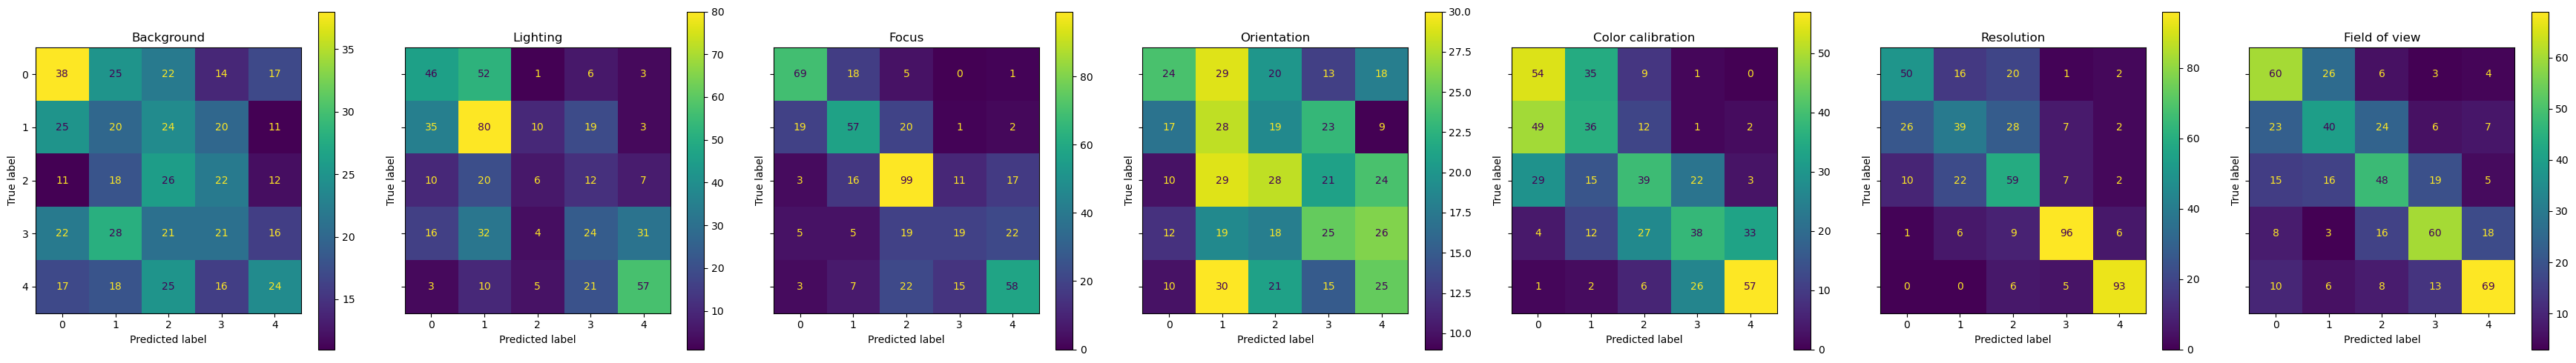


     Criteria      | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
------------------------------------------------------------------------------
    Background     |     25.32      |    25.08     |   0.1332   |   0.1342   |
     Lighting      |     38.37      |    37.95     |   0.5889   |   0.5662   |
      Focus        |     56.87      |    56.39     |   0.7174   |   0.7303   |
   Orientation     |     26.06      |    25.40     |   0.1450   |   0.1448   |
Color calibration  |     44.11      |    44.39     |   0.7421   |   0.7378   |
    Resolution     |     64.83      |    64.84     |   0.7997   |   0.8115   |
  Field of view    |     53.83      |    53.89     |   0.6346   |   0.6339   |

   MAE     |    MSE     | Precision (%)  |  Recall (%)  |    PLCC    |   SROCC    |
-----------------------------------------------------------------------------------
  0.8889   |   1.8329   |     45.23      |    44.97     |   0.5382   |   0.5366   |


wandb: Agent Starting Run: tu3gi68y with config:
wandb: 	batch_size: 10
wandb: 	crop: False
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 6
wandb: 	n_estimators: 100
wandb: 	num_distortions: 2
wandb: 	root: f17k
wandb: 	subsample: 1


Using cache found in /home/jovyan/.cache/torch/hub/miccunifi_ARNIQA_main


Loaded features from f17k/embeddings/features_2.npy
Loaded scores from f17k/embeddings/scores_2.npy
Training for criteria: Background


In [ ]:
import wandb
from train_num_distortions import train

sweep_config = {
    'method': 'grid',
    'metric': {
        'name': 'overall_srocc',
        'goal': 'maximize'
    },
    'parameters': {
        'num_distortions': {
            'values': [2, 5] # [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
        },
        'batch_size': {'value': 10},
        'root': {'value': "f17k"},
        'crop': {'value': False},
        'n_estimators': {'values': [50, 100]}, # [50, 100, 200, 300]
        'max_depth': {'values': [3, 6]}, # [3, 6, 9, 12]
        'learning_rate': {'values': [0.3, 0.1]}, # [0.3, 0.1, 0.05, 0.005]
        'subsample': {'values': [1, 0.7]} # [1, 0.7, 0.5, 0.3]
    }
}

sweep_id = wandb.sweep(sweep_config, project="BAA", entity="choekyel-hslu")
wandb.agent(sweep_id, train, count=32)
wandb.finish()